# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from sklearn.svm import SVC
from tensorflow.keras.utils import to_categorical
import warnings
import sklearn.exceptions

In [2]:
warnings.filterwarnings('ignore', category=sklearn.exceptions.UndefinedMetricWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Load all Data Sets

In [3]:
# Main X and Y data
x_train = pd.read_csv('Data/x_train_gr_smpl.csv')
x_test = pd.read_csv('Data/x_test_gr_smpl.csv')

y_train = pd.read_csv('Data/y_train_smpl.csv')
y_test = pd.read_csv('Data/y_test_smpl.csv')


import sklearn.model_selection as skms

x_train_4000, x_4000, y_train_4000, y_4000 = skms.train_test_split(x_train, y_train, test_size = 4000, random_state = 0)
x_train_9000, x_9000, y_train_9000, y_9000 = skms.train_test_split(x_train, y_train, test_size = 9000, random_state = 0)

x_test_4000 = x_test.append(x_4000, ignore_index=True)
y_test_4000 = y_test.append(y_4000, ignore_index=True)

x_test_9000 = x_test.append(x_9000, ignore_index=True)
y_test_9000 = y_test.append(y_9000, ignore_index=True)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train_4000.shape, x_test_4000.shape, y_train_4000.shape, y_test_4000.shape)
print(x_train_9000.shape, x_test_9000.shape, y_train_9000.shape, y_test_9000.shape)

(9690, 2304) (3090, 2304) (9690, 1) (3090, 1)
(5690, 2304) (7090, 2304) (5690, 1) (7090, 1)
(690, 2304) (12090, 2304) (690, 1) (12090, 1)


# Create Linear Classifier Function

In [4]:
def linear_classifier(x_train, y_train, x_test, y_test):
    
    y_train = np.array(y_train).flatten()
    y_test = y_test.values.flatten()
    
    model = SVC()
    model.fit(x_train, y_train)
    
    score = model.score(x_test, y_test)
    
    return print('Score of Linear Classifier:', score)

# Create Neural Network Function, Analyze and Visualize Results

In [5]:
def neural_network(x_train, y_train, x_test, y_test, hidden_layers, neurons, l_rate, epochs):
    
    x_train = np.array(x_train)
    x_train = x_train.reshape(len(x_train), 48, 48)
    x_train = x_train/255

    x_test = np.array(x_test)
    x_test = x_test.reshape(len(x_test), 48, 48)
    x_test = x_test/255

    # Neural Network Model
    model = Sequential()
    model.add(Flatten(input_shape = [48,48]))
    
    for i in range(hidden_layers):
        model.add(Dense(units=neurons, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    
    opt = SGD(learning_rate=l_rate) 
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=epochs)
    y_pred = np.argmax(model.predict(x_test, verbose=0), axis=-1)

    print('---------------------------------------------------------------------------------------------------------------')
    print('\n')
    print('Results')
    # Analyzing the results
    # Model Accuracy
    print('\n')
    scores = model.evaluate(x_test, y_test)
    print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    print('\n')
    
    
    
    # Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(cm)
    print('\n')
    
    # True Positive
    TP = np.diag(cm)
    # False Positive
    FP = cm.sum(axis=0) - TP
    # False Negative
    FN = cm.sum(axis=1) - TP
    # True Negative
    TN = cm.sum() - (FP+FN+TP)


    #True Positive Rate
    TPR = TP/(TP+FN)
    TPR_mean = np.round(TPR.mean(), 2)
    #False Positive Rate
    FPR = FP/(FP+TN)
    FPR_mean = np.round(FPR.mean(), 2)
    #Precision
    Precision = TP/(TP+FP)
    Precision_mean = np.round(Precision.mean(), 2)
    #Recall
    Recall = TP/(TP+FN)
    Recall_mean = np.round(Recall.mean(), 2)
    #F1 Measure
    F1 = 2 * (Precision * Recall) / (Precision + Recall)
    F1_mean = np.round(F1.mean(), 2)
    
    np.set_printoptions(precision=2)
    print('---------------------------------------------------------------------------------------------------------------')
    print('\n')
    print('TP rate: ', TPR)
    print('Mean TP rate: ', TPR_mean)
    print('FP rate: ', FPR)
    print('Mean FP rate: ', FPR_mean)
    print('Precision: ', Precision)
    print('Mean Precision: ', Precision_mean)
    print('Recall: ', Recall)
    print('Mean Recall: ', Recall_mean)
    print('F Measure: ', F1)
    print('Mean F Measure: ', F1_mean)
    print('\n')
    
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred))
    
    # Visualizing the results
    # Heatmap
    print('---------------------------------------------------------------------------------------------------------------')
    print('\n')
    print('\n')
    print('Visualization of Results')
    plt.figure(figsize=(11,7))
    sns.heatmap(cm, annot=True, fmt=' .0f', square=True, cmap='Blues_r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Heatmap of Confusion Matrix')
    
    plt.figure(figsize=(8,4))
    plt.scatter(Precision, Recall, c='b')
    plt.xlabel('Precsion')
    plt.ylabel('Recall')
    plt.title('Precision vs Recall Scatter Chart')
    plt.show()
    print('---------------------------------------------------------------------------------------------------------------')

# Create Convolutional Neural Network, Analyze and Visualize Results

In [6]:
def conv_neural_network(x_train, y_train, x_test, y_test, l_rate, epochs, momentum):    
    
    x_train = np.array(x_train)
    x_train = x_train.reshape((len(x_train), 48, 48, 1))
    x_train = x_train/255

    x_test = np.array(x_test)
    x_test = x_test.reshape((len(x_test), 48, 48, 1))
    x_test = x_test/255

    
    y_train = to_categorical(y_train)
    y_test_ = y_test.copy()
    y_test = to_categorical(y_test)
    
    
    # Neural Network Model
    model = Sequential()

    model.add(Conv2D(32, (3,3), input_shape=(48,48,1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(100))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    opt = SGD(learning_rate=l_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=epochs, batch_size=48)
    
    y_pred = np.argmax(model.predict(x_test, verbose=0), axis=-1)
    
    print('---------------------------------------------------------------------------------------------------------------')
    print('\n')
    print('Results')
    # Analyzing the results
    # Model Accuracy
    print('\n')
    scores = model.evaluate(x_test, y_test)
    print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    print('\n')
    
    # Confusion Matrix
    y_test = y_test_.copy()
    cm = metrics.confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(cm)
    print('\n')
    
    # True Positive
    TP = np.diag(cm)
    # False Positive
    FP = cm.sum(axis=0) - TP
    # False Negative
    FN = cm.sum(axis=1) - TP
    # True Negative
    TN = cm.sum() - (FP+FN+TP)


    #True Positive Rate
    TPR = TP/(TP+FN)
    TPR_mean = np.round(TPR.mean(), 2)
    #False Positive Rate
    FPR = FP/(FP+TN)
    FPR_mean = np.round(FPR.mean(), 2)
    #Precision
    Precision = TP/(TP+FP)
    Precision_mean = np.round(Precision.mean(), 2)
    #Recall
    Recall = TP/(TP+FN)
    Recall_mean = np.round(Recall.mean(), 2)
    #F1 Measure
    F1 = 2 * (Precision * Recall) / (Precision + Recall)
    F1_mean = np.round(F1.mean(), 2)
    
    np.set_printoptions(precision=2)
    print('---------------------------------------------------------------------------------------------------------------')
    print('\n')
    print('TP rate: ', TPR)
    print('Mean TP rate: ', TPR_mean)
    print('FP rate: ', FPR)
    print('Mean FP rate: ', FPR_mean)
    print('Precision: ', Precision)
    print('Mean Precision: ', Precision_mean)
    print('Recall: ', Recall)
    print('Mean Recall: ', Recall_mean)
    print('F Measure: ', F1)
    print('Mean F Measure: ', F1_mean)
    print('\n')
    
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred))
    
    # Visualizing the results
    # Heatmap
    print('---------------------------------------------------------------------------------------------------------------')
    print('\n')
    print('\n')
    print('Visualization of Results')
    plt.figure(figsize=(11,7))
    sns.heatmap(cm, annot=True, fmt=' .0f', square=True, cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Heatmap of Confusion Matrix')
    
    plt.figure(figsize=(8,4))
    plt.scatter(Precision, Recall, c='g')
    plt.xlabel('Precsion')
    plt.ylabel('Recall')
    plt.title('Precision vs Recall Scatter Chart')
    plt.show()
    print('---------------------------------------------------------------------------------------------------------------')

# Main Data Sets

# Linear Classifier

In [7]:
linear_classifier(x_train, y_train, x_test, y_test)

Score of Linear Classifier: 0.7087378640776699


# Multi-Layer Perceptron

# Varying the Neural Network Parameters

# Hidden Layers (Other Parameters remain Constant)

# 1 Hidden Layer

Epoch 1/5
303/303 [==============================] - 0s 864us/step - loss: 1.7272 - accuracy: 0.3985
Epoch 2/5
303/303 [==============================] - 0s 916us/step - loss: 1.4085 - accuracy: 0.5429
Epoch 3/5
303/303 [==============================] - 0s 824us/step - loss: 1.1912 - accuracy: 0.6150
Epoch 4/5
303/303 [==============================] - 0s 834us/step - loss: 1.0310 - accuracy: 0.6914
Epoch 5/5
303/303 [==============================] - 0s 853us/step - loss: 0.9130 - accuracy: 0.7418
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 667us/step - loss: 1.0899 - accuracy: 0.6906
loss of 1.0898923873901367; accuracy of 69.06148791313171%


Confusion Matrix:
[[  0  16   0   2  42   0   0   0   0   0]
 [ 13 455 108  23 120   0   0   0   1   0]
 [  0   7 599  57  87   0   0   0   0   0]
 [  3   7  87 327  18   1   1   2   1   3]
 [  4  24  12  48 561   0   1  

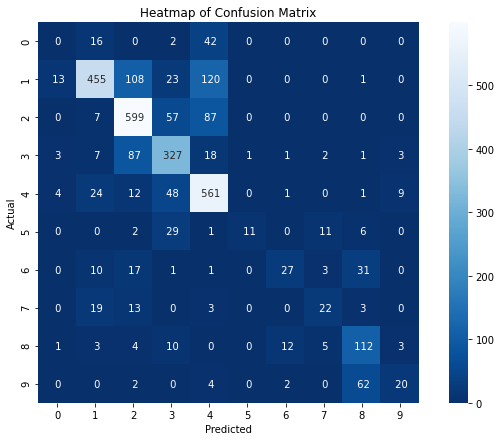

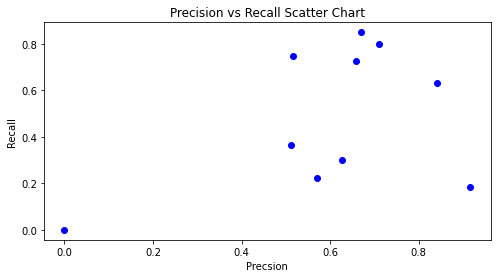

---------------------------------------------------------------------------------------------------------------


In [8]:
neural_network(x_train, y_train, x_test, y_test, hidden_layers=1, neurons=100, l_rate=0.01, epochs=5)

# 2 Hidden Layers

Epoch 1/5
303/303 [==============================] - 0s 900us/step - loss: 1.7546 - accuracy: 0.3774
Epoch 2/5
303/303 [==============================] - 0s 937us/step - loss: 1.4241 - accuracy: 0.5136
Epoch 3/5
303/303 [==============================] - 0s 889us/step - loss: 1.2001 - accuracy: 0.5778
Epoch 4/5
303/303 [==============================] - 0s 902us/step - loss: 1.0612 - accuracy: 0.6334
Epoch 5/5
303/303 [==============================] - 0s 901us/step - loss: 0.9155 - accuracy: 0.7002
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 626us/step - loss: 1.2331 - accuracy: 0.6055
loss of 1.2330684661865234; accuracy of 60.550159215927124%


Confusion Matrix:
[[  0  14  25   7  14   0   0   0   0   0]
 [  0 306 378  24  12   0   0   0   0   0]
 [  0   4 690  50   6   0   0   0   0   0]
 [  0   0 191 254   1   0   0   1   0   3]
 [  0  21 121  87 427   0   0 

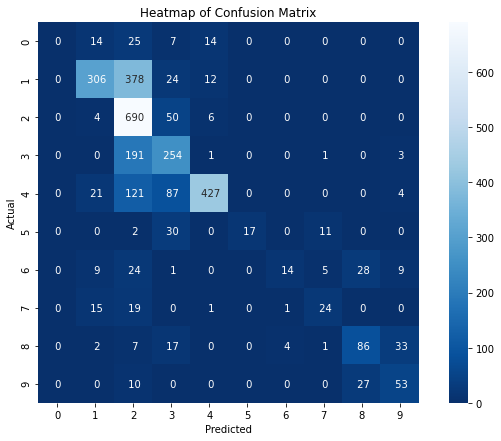

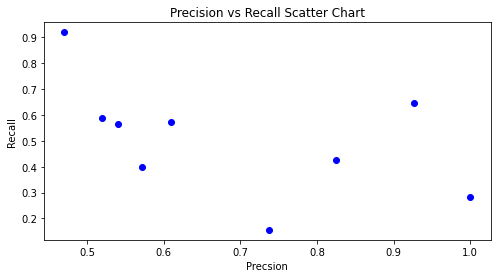

---------------------------------------------------------------------------------------------------------------


In [9]:
neural_network(x_train, y_train, x_test, y_test, hidden_layers=2, neurons=100, l_rate=0.01, epochs=5)

# 4 Hidden Layers

Epoch 1/5
303/303 [==============================] - 0s 1ms/step - loss: 1.8711 - accuracy: 0.3328
Epoch 2/5
303/303 [==============================] - 0s 987us/step - loss: 1.5834 - accuracy: 0.4526
Epoch 3/5
303/303 [==============================] - 0s 992us/step - loss: 1.3171 - accuracy: 0.5216
Epoch 4/5
303/303 [==============================] - 0s 996us/step - loss: 1.1350 - accuracy: 0.5910
Epoch 5/5
303/303 [==============================] - 0s 1ms/step - loss: 1.0009 - accuracy: 0.6514
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 719us/step - loss: 1.1072 - accuracy: 0.6550
loss of 1.1071900129318237; accuracy of 65.50161838531494%


Confusion Matrix:
[[  0  48   6   1   5   0   0   0   0   0]
 [  0 625  72   9  14   0   0   0   0   0]
 [  0 102 503 129  16   0   0   0   0   0]
 [  0  46  85 317   1   0   1   0   0   0]
 [  0 125  27  60 446   0   0   0  

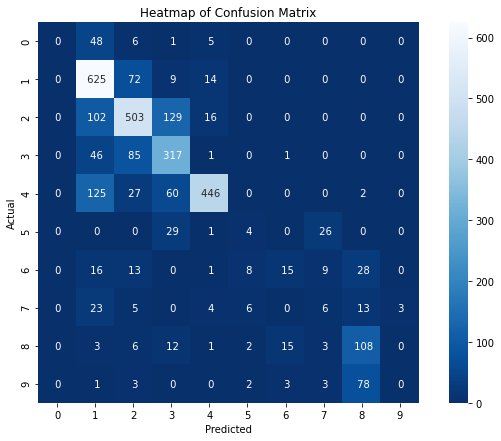

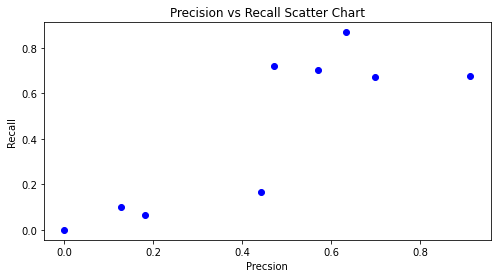

---------------------------------------------------------------------------------------------------------------


In [10]:
neural_network(x_train, y_train, x_test, y_test, hidden_layers=4, neurons=100, l_rate=0.01, epochs=5)

# Neurons in Hidden Layers (Other Parameters remain Constant)

# 50 Neurons

Epoch 1/5
303/303 [==============================] - 0s 784us/step - loss: 1.7949 - accuracy: 0.3576
Epoch 2/5
303/303 [==============================] - 0s 756us/step - loss: 1.5295 - accuracy: 0.4496
Epoch 3/5
303/303 [==============================] - 0s 777us/step - loss: 1.2907 - accuracy: 0.5504
Epoch 4/5
303/303 [==============================] - 0s 772us/step - loss: 1.0852 - accuracy: 0.6299
Epoch 5/5
303/303 [==============================] - 0s 841us/step - loss: 0.9380 - accuracy: 0.6993
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 599us/step - loss: 1.1068 - accuracy: 0.6586
loss of 1.1067920923233032; accuracy of 65.85760712623596%


Confusion Matrix:
[[  0  13   2   0  45   0   0   0   0   0]
 [  7 434 125  11 142   1   0   0   0   0]
 [  0   1 583  25 141   0   0   0   0   0]
 [  0   5 159 229  51   0   2   0   1   3]
 [  0  11  20  22 598   0   0  

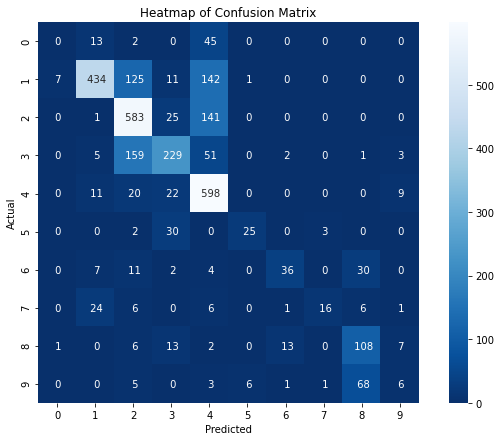

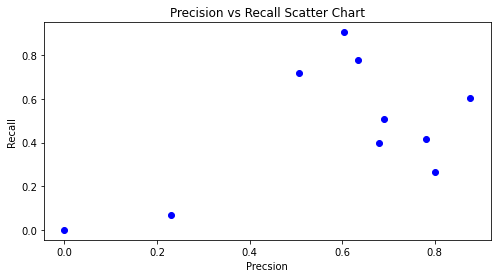

---------------------------------------------------------------------------------------------------------------


In [11]:
neural_network(x_train, y_train, x_test, y_test, hidden_layers=2, neurons=50, l_rate=0.01, epochs=5)

# 100 Neurons

Epoch 1/5
303/303 [==============================] - 0s 953us/step - loss: 1.7926 - accuracy: 0.3514
Epoch 2/5
303/303 [==============================] - 0s 916us/step - loss: 1.4741 - accuracy: 0.4854
Epoch 3/5
303/303 [==============================] - 0s 931us/step - loss: 1.2312 - accuracy: 0.5677
Epoch 4/5
303/303 [==============================] - 0s 970us/step - loss: 1.0590 - accuracy: 0.6427
Epoch 5/5
303/303 [==============================] - 0s 921us/step - loss: 0.9277 - accuracy: 0.6998
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 640us/step - loss: 1.1020 - accuracy: 0.6738
loss of 1.102039098739624; accuracy of 67.37864017486572%


Confusion Matrix:
[[  0  43  14   1   2   0   0   0   0   0]
 [  0 579 129   5   7   0   0   0   0   0]
 [  0  70 626  45   9   0   0   0   0   0]
 [  1  31 120 290   1   0   3   2   2   0]
 [  0 135  54  59 407   0   1   

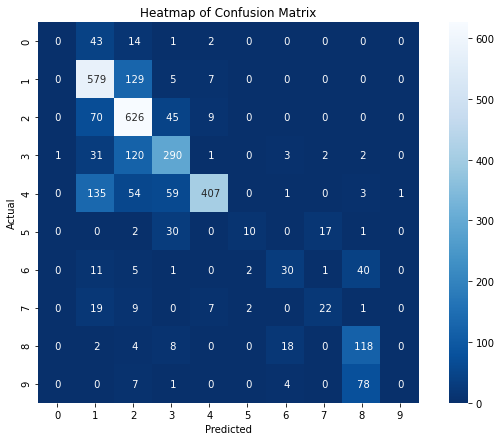

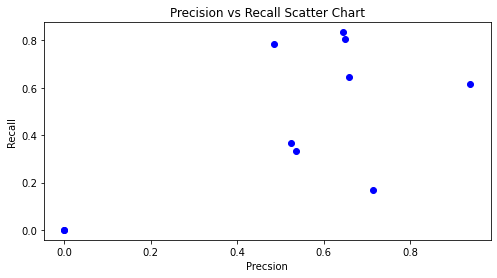

---------------------------------------------------------------------------------------------------------------


In [12]:
neural_network(x_train, y_train, x_test, y_test, hidden_layers=2, neurons=100, l_rate=0.01, epochs=5)

# 150 Neurons

Epoch 1/5
303/303 [==============================] - 0s 1ms/step - loss: 1.7508 - accuracy: 0.3884
Epoch 2/5
303/303 [==============================] - 0s 1ms/step - loss: 1.4332 - accuracy: 0.5076
Epoch 3/5
303/303 [==============================] - 0s 1ms/step - loss: 1.2017 - accuracy: 0.5849
Epoch 4/5
303/303 [==============================] - 0s 1ms/step - loss: 1.0398 - accuracy: 0.6600
Epoch 5/5
303/303 [==============================] - 0s 1ms/step - loss: 0.9075 - accuracy: 0.7184
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 798us/step - loss: 1.0919 - accuracy: 0.6369
loss of 1.0919482707977295; accuracy of 63.68932127952576%


Confusion Matrix:
[[  0  23   1   0  36   0   0   0   0   0]
 [  1 539  63   0 117   0   0   0   0   0]
 [  0  59 542   2 147   0   0   0   0   0]
 [  2  51 139 131 121   0   0   0   1   5]
 [  0  32   5   1 613   0   0   0   0   9

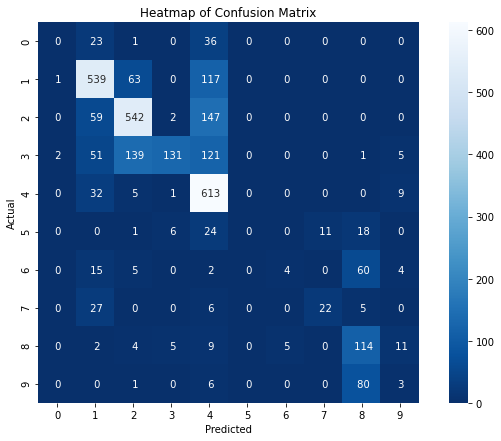

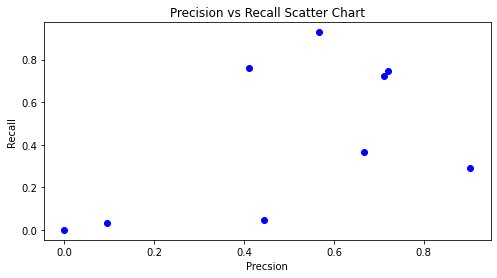

---------------------------------------------------------------------------------------------------------------


In [13]:
neural_network(x_train, y_train, x_test, y_test, hidden_layers=2, neurons=150, l_rate=0.01, epochs=5)       

# Learning Rate (Other Parameters remian Constant)

# Learning Rate = 0.005

Epoch 1/5
303/303 [==============================] - 0s 890us/step - loss: 1.8290 - accuracy: 0.3499
Epoch 2/5
303/303 [==============================] - 0s 962us/step - loss: 1.5994 - accuracy: 0.4716
Epoch 3/5
303/303 [==============================] - 0s 986us/step - loss: 1.4150 - accuracy: 0.5350
Epoch 4/5
303/303 [==============================] - 0s 945us/step - loss: 1.2465 - accuracy: 0.5945
Epoch 5/5
303/303 [==============================] - 0s 935us/step - loss: 1.1081 - accuracy: 0.6545
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 629us/step - loss: 1.2720 - accuracy: 0.5935
loss of 1.2719587087631226; accuracy of 59.35274958610535%


Confusion Matrix:
[[  0  33   0   0  27   0   0   0   0   0]
 [  0 607  22   0  91   0   0   0   0   0]
 [  0 165 367  33 185   0   0   0   0   0]
 [  2 136  63 193  51   0   0   0   1   4]
 [  0  73   7  43 535   0   0  

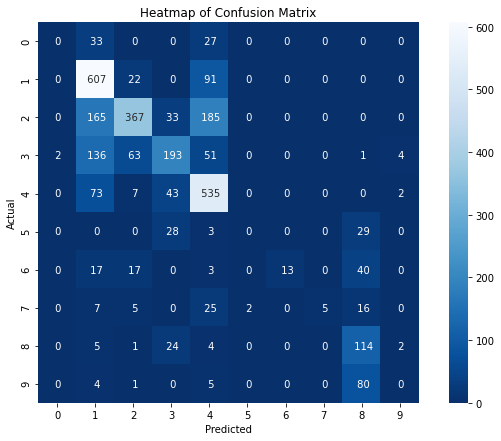

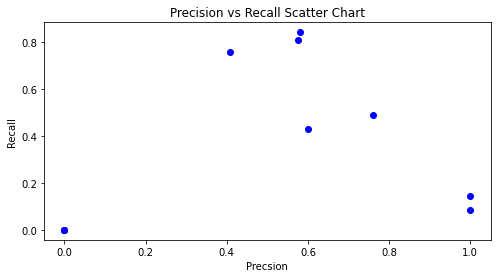

---------------------------------------------------------------------------------------------------------------


In [14]:
neural_network(x_train, y_train, x_test, y_test, hidden_layers=2, neurons=100, l_rate=0.005, epochs=5)

# Learning Rate = 0.01

Epoch 1/5
303/303 [==============================] - 0s 897us/step - loss: 1.7573 - accuracy: 0.3600
Epoch 2/5
303/303 [==============================] - 0s 1ms/step - loss: 1.4474 - accuracy: 0.5029
Epoch 3/5
303/303 [==============================] - 0s 1ms/step - loss: 1.2274 - accuracy: 0.5791
Epoch 4/5
303/303 [==============================] - 0s 938us/step - loss: 1.0500 - accuracy: 0.6411
Epoch 5/5
303/303 [==============================] - 0s 953us/step - loss: 0.9331 - accuracy: 0.7009
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 725us/step - loss: 1.1960 - accuracy: 0.6427
loss of 1.1960413455963135; accuracy of 64.27184343338013%


Confusion Matrix:
[[  0  53   0   0   7   0   0   0   0   0]
 [  0 680  12   1  26   1   0   0   0   0]
 [  0 249 363  33 105   0   0   0   0   0]
 [  2 168  36 219  23   0   0   0   0   2]
 [  0 105   2  10 539   0   2   0  

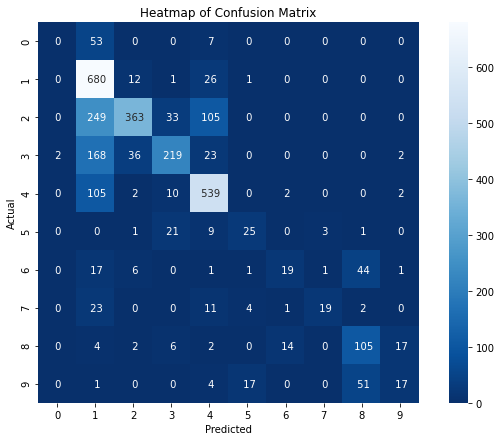

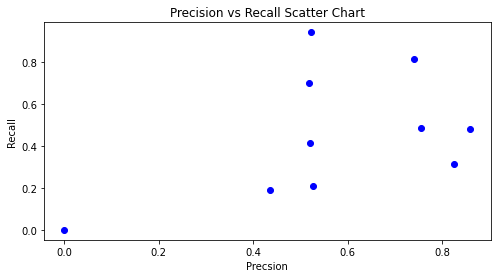

---------------------------------------------------------------------------------------------------------------


In [15]:
neural_network(x_train, y_train, x_test, y_test, hidden_layers=2, neurons=100, l_rate=0.01, epochs=5)

# Learning Rate = 0.02

Epoch 1/5
303/303 [==============================] - 0s 936us/step - loss: 1.6670 - accuracy: 0.4079
Epoch 2/5
303/303 [==============================] - 0s 1ms/step - loss: 1.2741 - accuracy: 0.5449
Epoch 3/5
303/303 [==============================] - 0s 942us/step - loss: 1.0359 - accuracy: 0.6487
Epoch 4/5
303/303 [==============================] - 0s 950us/step - loss: 0.8860 - accuracy: 0.7068
Epoch 5/5
303/303 [==============================] - 0s 942us/step - loss: 0.7581 - accuracy: 0.7517
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 751us/step - loss: 0.8903 - accuracy: 0.7424
loss of 0.8903270363807678; accuracy of 74.23948049545288%


Confusion Matrix:
[[  0  34   5   4  17   0   0   0   0   0]
 [  1 537 111  45  26   0   0   0   0   0]
 [  0  23 568 143  16   0   0   0   0   0]
 [  0   2  13 430   2   0   3   0   0   0]
 [  1  32  23  71 526   0   0   0

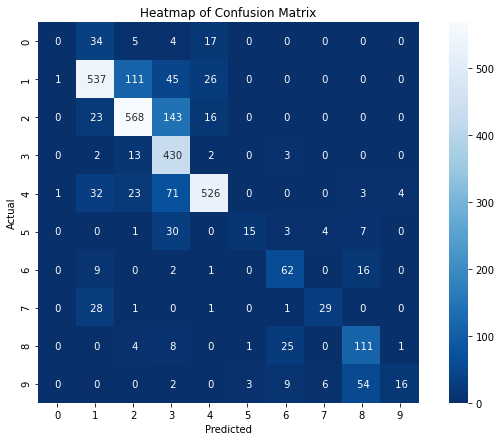

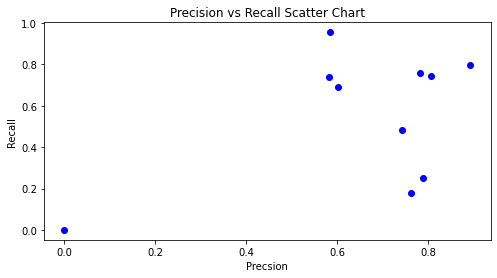

---------------------------------------------------------------------------------------------------------------


In [16]:
neural_network(x_train, y_train, x_test, y_test, hidden_layers=2, neurons=100, l_rate=0.02, epochs=5)

# Epochs (Other Parameters remain Constant)

# Epochs = 5

Epoch 1/5
303/303 [==============================] - 0s 955us/step - loss: 1.7252 - accuracy: 0.3903
Epoch 2/5
303/303 [==============================] - 0s 944us/step - loss: 1.4050 - accuracy: 0.5102
Epoch 3/5
303/303 [==============================] - 0s 926us/step - loss: 1.1844 - accuracy: 0.5878
Epoch 4/5
303/303 [==============================] - 0s 935us/step - loss: 1.0326 - accuracy: 0.6498
Epoch 5/5
303/303 [==============================] - 0s 942us/step - loss: 0.8948 - accuracy: 0.7200
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 651us/step - loss: 1.0836 - accuracy: 0.6689
loss of 1.083579182624817; accuracy of 66.89320206642151%


Confusion Matrix:
[[  3  11   0   2  44   0   0   0   0   0]
 [ 43 476  46  12 139   0   0   0   3   1]
 [ 41  20 458 114 107   0   0   0  10   0]
 [ 13   3  32 380  12   0   4   0   5   1]
 [  6  19   3  41 575   0   2   

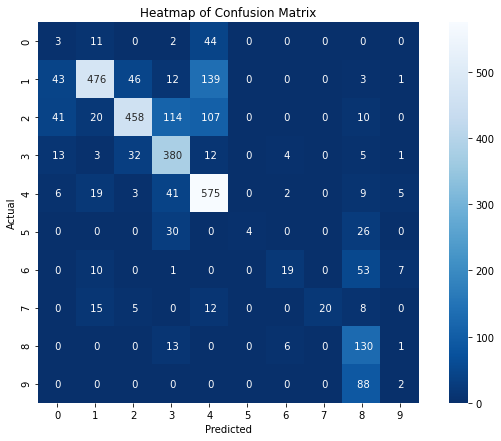

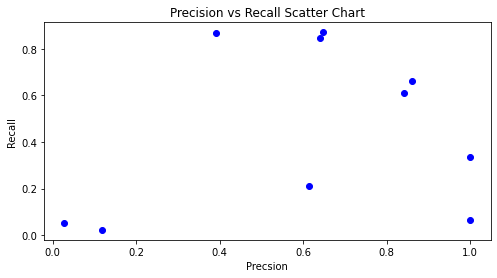

---------------------------------------------------------------------------------------------------------------


In [17]:
neural_network(x_train, y_train, x_test, y_test, hidden_layers=2, neurons=100, l_rate=0.01, epochs=5)

# Epochs = 10

Epoch 1/10
303/303 [==============================] - 0s 897us/step - loss: 1.7528 - accuracy: 0.3750
Epoch 2/10
303/303 [==============================] - 0s 981us/step - loss: 1.4222 - accuracy: 0.5131
Epoch 3/10
303/303 [==============================] - 0s 920us/step - loss: 1.1808 - accuracy: 0.5923
Epoch 4/10
303/303 [==============================] - 0s 940us/step - loss: 1.0206 - accuracy: 0.6623
Epoch 5/10
303/303 [==============================] - 0s 950us/step - loss: 0.8579 - accuracy: 0.7296
Epoch 6/10
303/303 [==============================] - 0s 983us/step - loss: 0.7602 - accuracy: 0.7703
Epoch 7/10
303/303 [==============================] - 0s 928us/step - loss: 0.6763 - accuracy: 0.7967
Epoch 8/10
303/303 [==============================] - 0s 947us/step - loss: 0.6258 - accuracy: 0.8183
Epoch 9/10
303/303 [==============================] - 0s 963us/step - loss: 0.5663 - accuracy: 0.8332
Epoch 10/10
303/303 [==============================] - 0s 940us/step - loss: 0.520

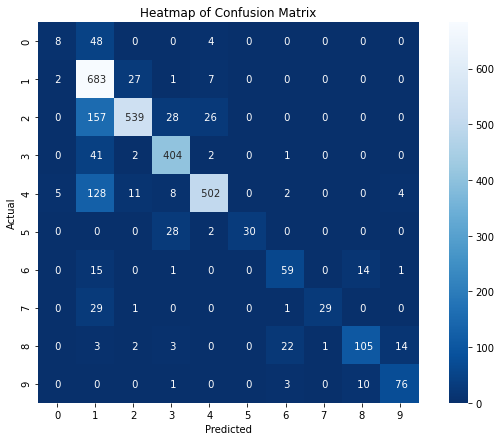

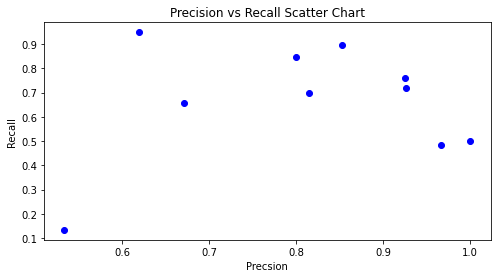

---------------------------------------------------------------------------------------------------------------


In [18]:
neural_network(x_train, y_train, x_test, y_test, hidden_layers=2, neurons=100, l_rate=0.01, epochs=10)

# Convolutional Neural Network

# Varying the Neural Network Parameters

# Learning Rate (Other Parameters remian Constant)

# Learning Rate = 0.005

Epoch 1/5
202/202 [==============================] - 5s 24ms/step - loss: 1.5066 - accuracy: 0.4429
Epoch 2/5
202/202 [==============================] - 5s 24ms/step - loss: 0.7981 - accuracy: 0.7412
Epoch 3/5
202/202 [==============================] - 5s 24ms/step - loss: 0.4874 - accuracy: 0.8509
Epoch 4/5
202/202 [==============================] - 5s 24ms/step - loss: 0.3141 - accuracy: 0.9135
Epoch 5/5
202/202 [==============================] - 5s 24ms/step - loss: 0.2404 - accuracy: 0.9326
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 4ms/step - loss: 0.4754 - accuracy: 0.8770
loss of 0.475398451089859; accuracy of 87.70226240158081%


Confusion Matrix:
[[ 12  30   0   1  17   0   0   0   0   0]
 [  0 650  30   6  31   0   2   0   1   0]
 [  0  24 685  10  30   0   0   0   1   0]
 [  0   5  14 414  12   0   4   0   1   0]
 [  0  38  11   6 602   0   0   0   1  

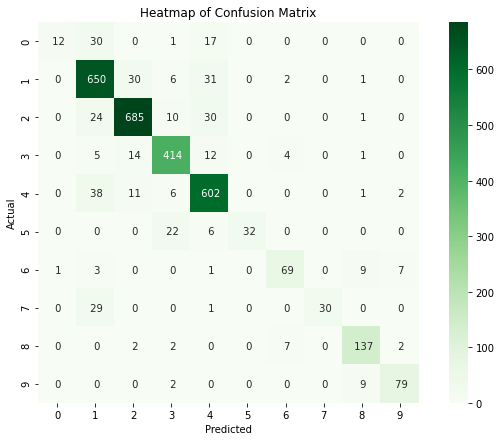

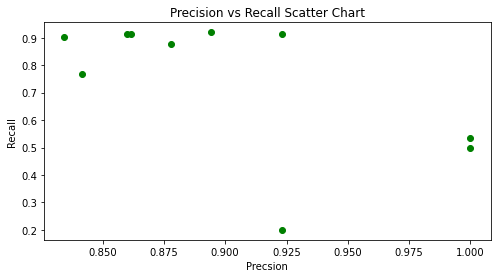

---------------------------------------------------------------------------------------------------------------


In [19]:
conv_neural_network(x_train, y_train, x_test, y_test, l_rate=0.005, epochs=5, momentum=0.9)

# Learning Rate = 0.01

Epoch 1/5
202/202 [==============================] - 5s 25ms/step - loss: 1.4249 - accuracy: 0.4748
Epoch 2/5
202/202 [==============================] - 5s 26ms/step - loss: 0.5490 - accuracy: 0.8285
Epoch 3/5
202/202 [==============================] - 5s 26ms/step - loss: 0.2680 - accuracy: 0.9205
Epoch 4/5
202/202 [==============================] - 5s 24ms/step - loss: 0.1702 - accuracy: 0.9519
Epoch 5/5
202/202 [==============================] - 5s 24ms/step - loss: 0.1145 - accuracy: 0.9724
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 4ms/step - loss: 0.4415 - accuracy: 0.9029
loss of 0.4414638578891754; accuracy of 90.29126167297363%


Confusion Matrix:
[[ 21  27   0   7   5   0   0   0   0   0]
 [  3 687  12  10   3   0   3   0   1   1]
 [  1  50 683  16   0   0   0   0   0   0]
 [  0   4   2 440   1   2   1   0   0   0]
 [  4  59   5  11 576   0   1   0   0 

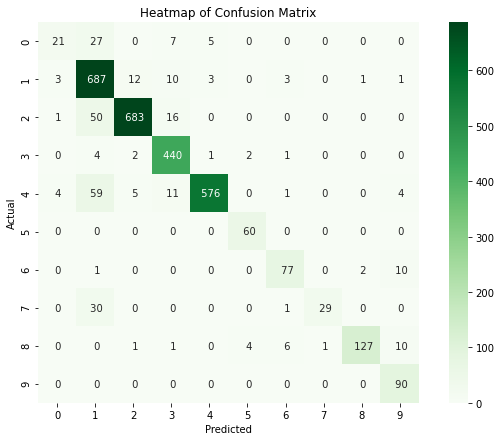

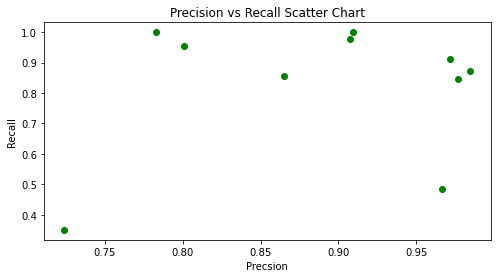

---------------------------------------------------------------------------------------------------------------


In [20]:
conv_neural_network(x_train, y_train, x_test, y_test, l_rate=0.01, epochs=5, momentum=0.9)

# Learning Rate = 0.02

Epoch 1/5
202/202 [==============================] - 5s 25ms/step - loss: 1.1388 - accuracy: 0.5900
Epoch 2/5
202/202 [==============================] - 5s 27ms/step - loss: 0.3383 - accuracy: 0.8951
Epoch 3/5
202/202 [==============================] - 5s 26ms/step - loss: 0.1586 - accuracy: 0.9543
Epoch 4/5
202/202 [==============================] - 5s 26ms/step - loss: 0.1042 - accuracy: 0.9682
Epoch 5/5
202/202 [==============================] - 5s 27ms/step - loss: 0.0873 - accuracy: 0.9735
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 4ms/step - loss: 0.4359 - accuracy: 0.8816
loss of 0.4359402656555176; accuracy of 88.15534114837646%


Confusion Matrix:
[[ 22  13   4   1  19   0   0   0   0   1]
 [  1 541 133   1  42   0   2   0   0   0]
 [  0   4 735   7   3   0   1   0   0   0]
 [  0   1  21 426   0   1   1   0   0   0]
 [  1  12  33  11 598   0   2   0   0 

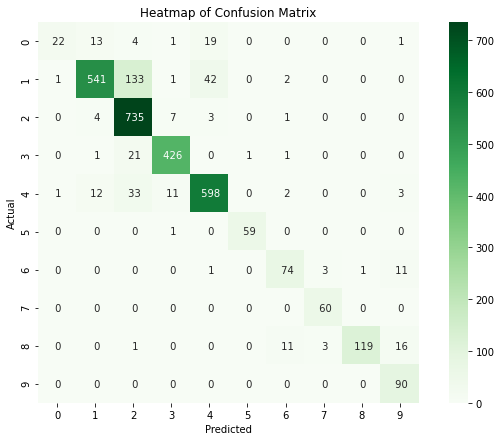

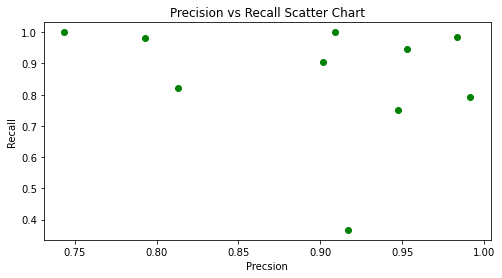

---------------------------------------------------------------------------------------------------------------


In [21]:
conv_neural_network(x_train, y_train, x_test, y_test, l_rate=0.02, epochs=5, momentum=0.9)

# Epochs (Other Parameters remain Constant)

# Epochs = 5

Epoch 1/5
202/202 [==============================] - 5s 27ms/step - loss: 1.3590 - accuracy: 0.5098
Epoch 2/5
202/202 [==============================] - 6s 28ms/step - loss: 0.5528 - accuracy: 0.8261
Epoch 3/5
202/202 [==============================] - 6s 29ms/step - loss: 0.2517 - accuracy: 0.9295
Epoch 4/5
202/202 [==============================] - 6s 30ms/step - loss: 0.1858 - accuracy: 0.9462
Epoch 5/5
202/202 [==============================] - 6s 29ms/step - loss: 0.1226 - accuracy: 0.9653
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 4ms/step - loss: 0.3224 - accuracy: 0.9029
loss of 0.3223811686038971; accuracy of 90.29126167297363%


Confusion Matrix:
[[ 28  28   0   1   3   0   0   0   0   0]
 [  1 662  34   5  17   0   1   0   0   0]
 [  0  24 709   9   8   0   0   0   0   0]
 [  0   3  10 429   5   3   0   0   0   0]
 [  1  38   8   8 605   0   0   0   0 

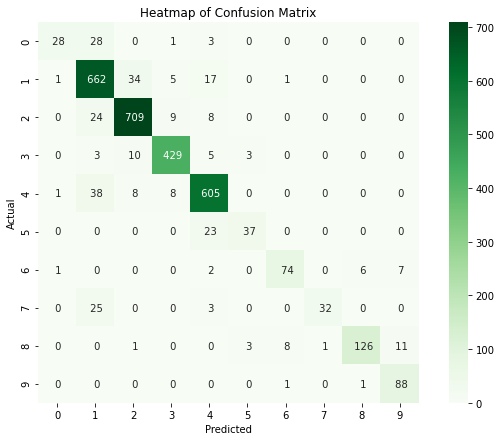

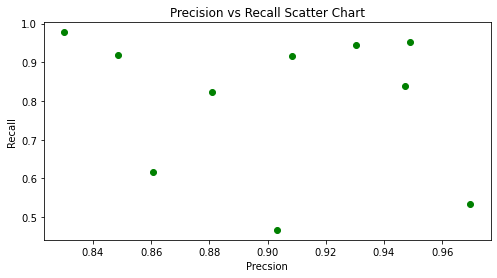

---------------------------------------------------------------------------------------------------------------


In [22]:
conv_neural_network(x_train, y_train, x_test, y_test, l_rate=0.01, epochs=5, momentum=0.9)

# Epochs = 10

Epoch 1/10
202/202 [==============================] - 5s 26ms/step - loss: 1.4320 - accuracy: 0.4759
Epoch 2/10
202/202 [==============================] - 5s 26ms/step - loss: 0.5872 - accuracy: 0.8125
Epoch 3/10
202/202 [==============================] - 5s 26ms/step - loss: 0.3144 - accuracy: 0.9076
Epoch 4/10
202/202 [==============================] - 5s 26ms/step - loss: 0.1920 - accuracy: 0.9438
Epoch 5/10
202/202 [==============================] - 5s 25ms/step - loss: 0.1351 - accuracy: 0.9630
Epoch 6/10
202/202 [==============================] - 5s 25ms/step - loss: 0.0957 - accuracy: 0.9742
Epoch 7/10
202/202 [==============================] - 5s 27ms/step - loss: 0.0757 - accuracy: 0.9818
Epoch 8/10
202/202 [==============================] - 5s 27ms/step - loss: 0.0599 - accuracy: 0.9850
Epoch 9/10
202/202 [==============================] - 6s 28ms/step - loss: 0.0559 - accuracy: 0.9859
Epoch 10/10
202/202 [==============================] - 6s 31ms/step - loss: 0.0440 - accura

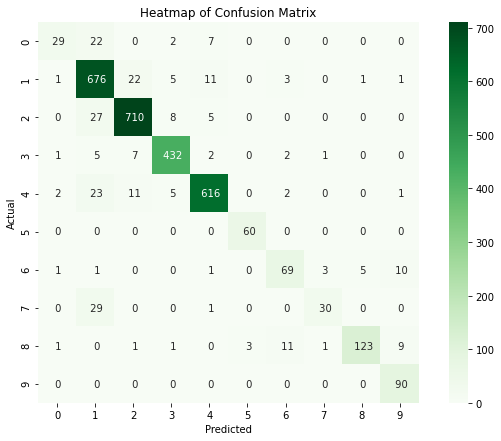

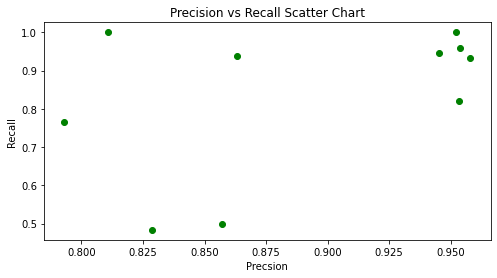

---------------------------------------------------------------------------------------------------------------


In [23]:
conv_neural_network(x_train, y_train, x_test, y_test, l_rate=0.01, epochs=10, momentum=0.9)

# Momentum (Other Parameters remain Constant)

# Momentum = 0.5

Epoch 1/5
202/202 [==============================] - 6s 29ms/step - loss: 1.7230 - accuracy: 0.3636
Epoch 2/5
202/202 [==============================] - 6s 29ms/step - loss: 1.2917 - accuracy: 0.5318
Epoch 3/5
202/202 [==============================] - 6s 29ms/step - loss: 0.9721 - accuracy: 0.6870
Epoch 4/5
202/202 [==============================] - 6s 29ms/step - loss: 0.7680 - accuracy: 0.7663
Epoch 5/5
202/202 [==============================] - 6s 29ms/step - loss: 0.6195 - accuracy: 0.8129
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 4ms/step - loss: 0.8789 - accuracy: 0.7832
loss of 0.8788660168647766; accuracy of 78.3171534538269%


Confusion Matrix:
[[ 11  24   0   0  25   0   0   0   0   0]
 [  5 606  35   0  73   0   0   0   0   1]
 [ 11  71 565  14  89   0   0   0   0   0]
 [  8  10  21 362  41   1   2   0   1   4]
 [  0  36   4   3 610   0   0   0   0  

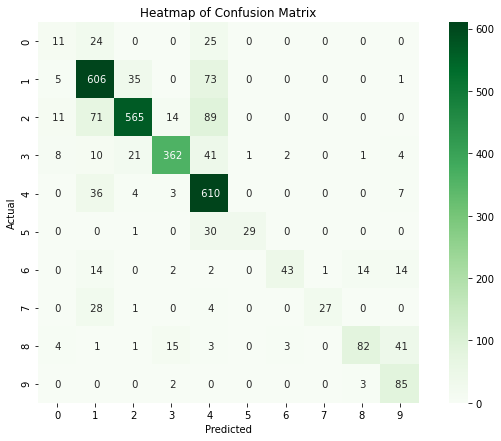

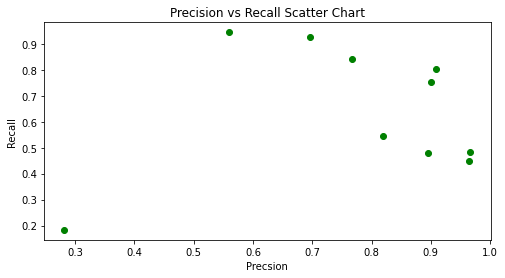

---------------------------------------------------------------------------------------------------------------


In [24]:
conv_neural_network(x_train, y_train, x_test, y_test, l_rate=0.01, epochs=5, momentum=0.5)

# Momentum = 0.7

Epoch 1/5
202/202 [==============================] - 5s 26ms/step - loss: 1.6089 - accuracy: 0.4008
Epoch 2/5
202/202 [==============================] - 5s 26ms/step - loss: 1.0462 - accuracy: 0.6472
Epoch 3/5
202/202 [==============================] - 5s 25ms/step - loss: 0.7415 - accuracy: 0.7700
Epoch 4/5
202/202 [==============================] - 5s 25ms/step - loss: 0.5599 - accuracy: 0.8282
Epoch 5/5
202/202 [==============================] - 5s 26ms/step - loss: 0.4452 - accuracy: 0.8658
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 4ms/step - loss: 1.0153 - accuracy: 0.7919
loss of 1.0152865648269653; accuracy of 79.1909396648407%


Confusion Matrix:
[[ 35  15   0  10   0   0   0   0   0   0]
 [ 17 622  24  48   5   0   2   0   2   0]
 [ 11  65 577  88   8   0   0   0   1   0]
 [  3   2   1 435   1   0   4   0   4   0]
 [ 23  79  12  81 459   0   4   0   1  

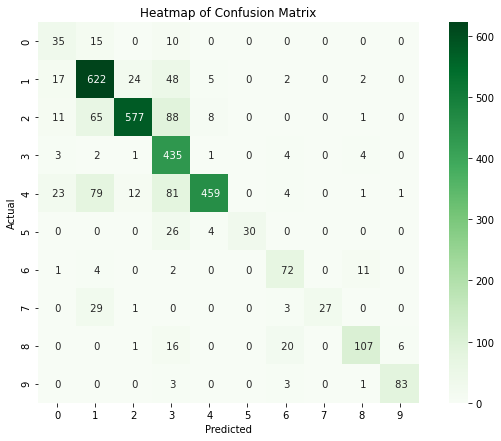

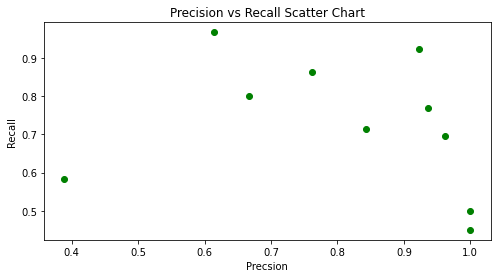

---------------------------------------------------------------------------------------------------------------


In [25]:
conv_neural_network(x_train, y_train, x_test, y_test, l_rate=0.01, epochs=5, momentum=0.7)

# Momentum = 0.9

Epoch 1/5
202/202 [==============================] - 5s 26ms/step - loss: 1.3613 - accuracy: 0.5109
Epoch 2/5
202/202 [==============================] - 5s 26ms/step - loss: 0.4706 - accuracy: 0.8566
Epoch 3/5
202/202 [==============================] - 5s 26ms/step - loss: 0.2329 - accuracy: 0.9353
Epoch 4/5
202/202 [==============================] - 5s 27ms/step - loss: 0.1401 - accuracy: 0.9637
Epoch 5/5
202/202 [==============================] - 6s 28ms/step - loss: 0.1044 - accuracy: 0.9743
---------------------------------------------------------------------------------------------------------------


Results


97/97 [==============================] - 0s 4ms/step - loss: 0.3457 - accuracy: 0.9049
loss of 0.3457103967666626; accuracy of 90.48543572425842%


Confusion Matrix:
[[ 31  24   1   2   2   0   0   0   0   0]
 [  0 656  48  10   4   0   2   0   0   0]
 [  0   9 734   4   3   0   0   0   0   0]
 [  0   5  22 417   1   0   5   0   0   0]
 [  0  43  39   6 572   0   0   0   0 

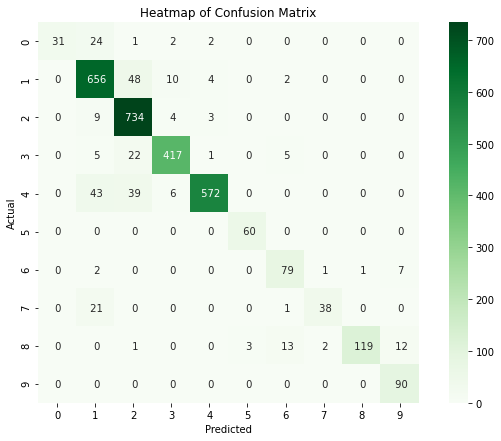

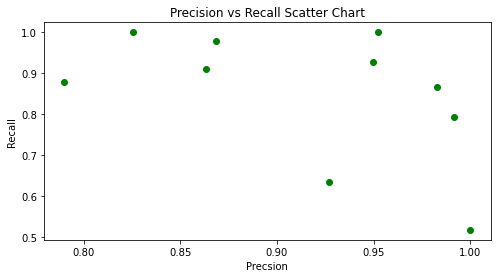

---------------------------------------------------------------------------------------------------------------


In [26]:
conv_neural_network(x_train, y_train, x_test, y_test, l_rate=0.01, epochs=5, momentum=0.9)

# 4000 Data Sets

# Linear Classifier

In [27]:
linear_classifier(x_train_4000, y_train_4000, x_test_4000, y_test_4000)

Score of Linear Classifier: 0.7698166431593794


# Multi-Layer Perceptron

# Varying the Neural Network Parameters

# Hidden Layers (Other Parameters remain Constant)

# 1 Hidden Layer

Epoch 1/5
178/178 [==============================] - 0s 875us/step - loss: 1.7954 - accuracy: 0.3555
Epoch 2/5
178/178 [==============================] - 0s 943us/step - loss: 1.5738 - accuracy: 0.4750
Epoch 3/5
178/178 [==============================] - 0s 942us/step - loss: 1.4083 - accuracy: 0.5366
Epoch 4/5
178/178 [==============================] - 0s 944us/step - loss: 1.2825 - accuracy: 0.5794
Epoch 5/5
178/178 [==============================] - 0s 886us/step - loss: 1.1703 - accuracy: 0.6220
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 0s 580us/step - loss: 1.1967 - accuracy: 0.6546
loss of 1.196679711341858; accuracy of 65.45839309692383%


Confusion Matrix:
[[  15   90    9   14   16    0    0    0    0    0]
 [   7 1263  176   88   78    0    0    0    4    0]
 [  14  191 1237  129  115    0    0    0    0    0]
 [   7   61  251  641   71    1    0    0  

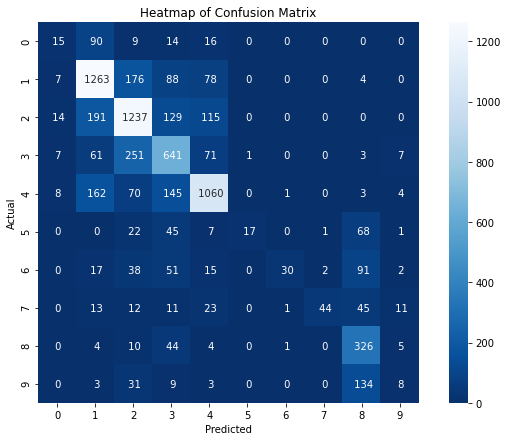

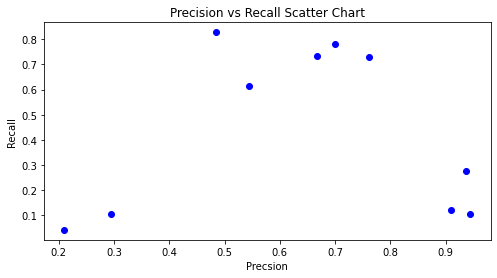

---------------------------------------------------------------------------------------------------------------


In [28]:
neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, hidden_layers=1, neurons=100, l_rate=0.01, epochs=5)

# 2 Hidden Layers

Epoch 1/5
178/178 [==============================] - 0s 939us/step - loss: 1.8291 - accuracy: 0.3496
Epoch 2/5
178/178 [==============================] - 0s 990us/step - loss: 1.6435 - accuracy: 0.4362
Epoch 3/5
178/178 [==============================] - 0s 938us/step - loss: 1.4697 - accuracy: 0.4968
Epoch 4/5
178/178 [==============================] - 0s 1ms/step - loss: 1.3148 - accuracy: 0.5409
Epoch 5/5
178/178 [==============================] - 0s 960us/step - loss: 1.1703 - accuracy: 0.5967
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 0s 632us/step - loss: 1.1767 - accuracy: 0.6227
loss of 1.1767339706420898; accuracy of 62.27080225944519%


Confusion Matrix:
[[   0  105   20   11    8    0    0    0    0    0]
 [   0 1009  431  107   69    0    0    0    0    0]
 [   0   58 1427  140   60    0    0    0    1    0]
 [   1   14  382  586   52    0    1    0   

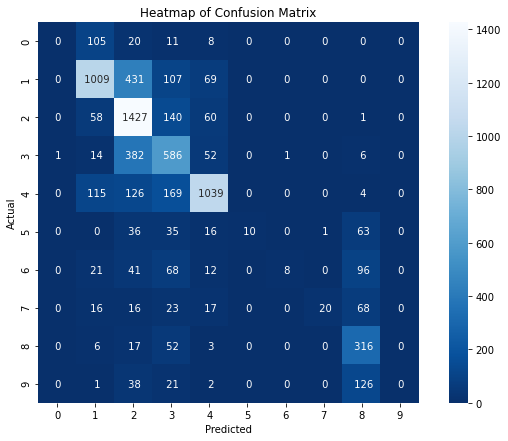

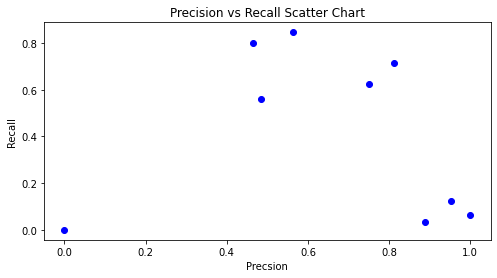

---------------------------------------------------------------------------------------------------------------


In [29]:
neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, hidden_layers=2, neurons=100, l_rate=0.01, epochs=5)

# 4 Hidden Layers

Epoch 1/5
178/178 [==============================] - 0s 1ms/step - loss: 1.8632 - accuracy: 0.3158
Epoch 2/5
178/178 [==============================] - 0s 1ms/step - loss: 1.6285 - accuracy: 0.4125
Epoch 3/5
178/178 [==============================] - 0s 1ms/step - loss: 1.4483 - accuracy: 0.4613
Epoch 4/5
178/178 [==============================] - 0s 1ms/step - loss: 1.3132 - accuracy: 0.5072
Epoch 5/5
178/178 [==============================] - 0s 987us/step - loss: 1.2167 - accuracy: 0.5494
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 0s 662us/step - loss: 1.2278 - accuracy: 0.5670
loss of 1.2277873754501343; accuracy of 56.69957399368286%


Confusion Matrix:
[[   0  114    2    6   22    0    0    0    0    0]
 [   0 1249   95   45  227    0    0    0    0    0]
 [   0  400  744  124  418    0    0    0    0    0]
 [   0  175   78  554  231    0    0    0    3    

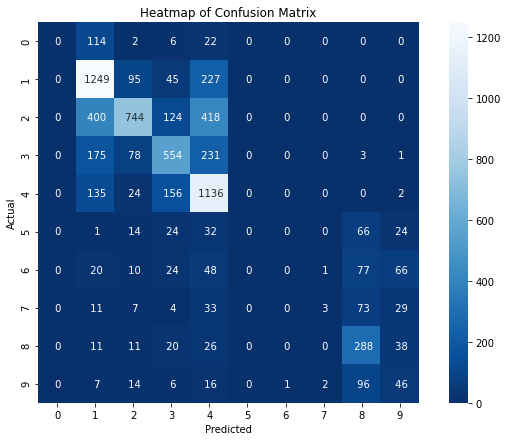

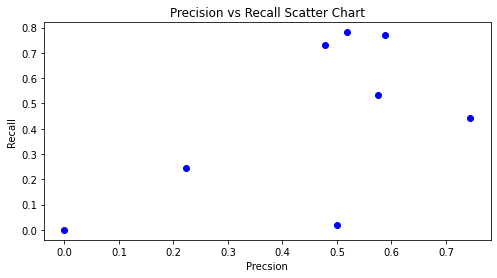

---------------------------------------------------------------------------------------------------------------


In [30]:
neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, hidden_layers=4, neurons=100, l_rate=0.01, epochs=5)

# Neurons in Hidden Layers (Other Parameters remain Constant)

# 50 Neurons

Epoch 1/5
178/178 [==============================] - 0s 814us/step - loss: 1.8425 - accuracy: 0.3292
Epoch 2/5
178/178 [==============================] - 0s 764us/step - loss: 1.6524 - accuracy: 0.4327
Epoch 3/5
178/178 [==============================] - 0s 839us/step - loss: 1.4970 - accuracy: 0.4916
Epoch 4/5
178/178 [==============================] - 0s 753us/step - loss: 1.3415 - accuracy: 0.5381
Epoch 5/5
178/178 [==============================] - 0s 805us/step - loss: 1.2198 - accuracy: 0.5830
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 0s 646us/step - loss: 1.2819 - accuracy: 0.5598
loss of 1.281947374343872; accuracy of 55.98025321960449%


Confusion Matrix:
[[   3   28   36   12   64    0    0    1    0    0]
 [   1  510  676   86  334    0    0    0    9    0]
 [   1    6 1347   97  232    0    0    0    3    0]
 [   1    2  315  494  214    3    0    1  

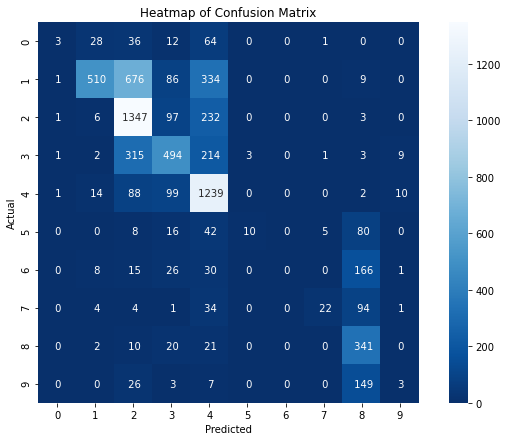

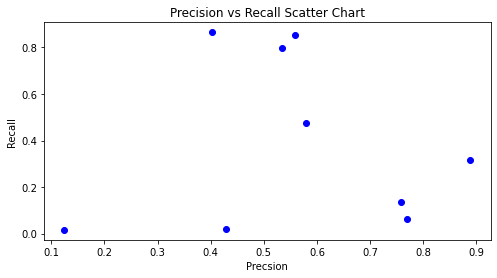

---------------------------------------------------------------------------------------------------------------


In [31]:
neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, hidden_layers=2, neurons=50, l_rate=0.01, epochs=5)

# 100 Neurons

Epoch 1/5
178/178 [==============================] - 0s 1ms/step - loss: 1.8192 - accuracy: 0.3448
Epoch 2/5
178/178 [==============================] - 0s 1ms/step - loss: 1.6022 - accuracy: 0.4582
Epoch 3/5
178/178 [==============================] - 0s 995us/step - loss: 1.4254 - accuracy: 0.5127
Epoch 4/5
178/178 [==============================] - 0s 907us/step - loss: 1.2804 - accuracy: 0.5515
Epoch 5/5
178/178 [==============================] - 0s 943us/step - loss: 1.1616 - accuracy: 0.5880
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 0s 617us/step - loss: 1.2840 - accuracy: 0.5736
loss of 1.28398859500885; accuracy of 57.3624849319458%


Confusion Matrix:
[[   0  107   33    4    0    0    0    0    0    0]
 [   0 1023  509   75    5    0    0    0    4    0]
 [   0   81 1492  106    6    0    0    0    1    0]
 [   0   28  446  555    0    1    3    0    9   

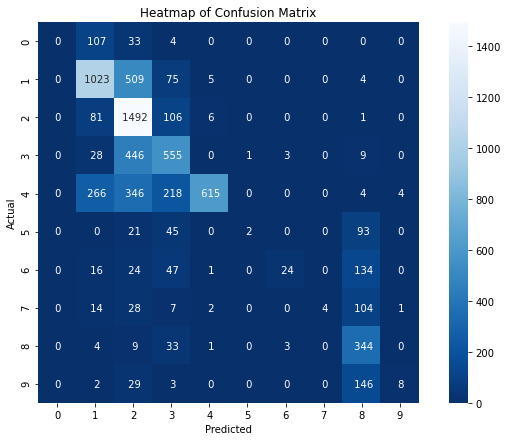

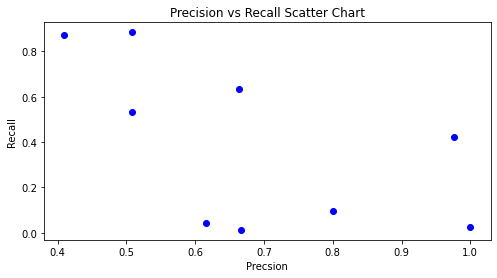

---------------------------------------------------------------------------------------------------------------


In [32]:
neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, hidden_layers=2, neurons=100, l_rate=0.01, epochs=5)

# 150 Neurons

Epoch 1/5
178/178 [==============================] - 0s 1ms/step - loss: 1.8156 - accuracy: 0.3462
Epoch 2/5
178/178 [==============================] - 0s 1ms/step - loss: 1.6031 - accuracy: 0.4473
Epoch 3/5
178/178 [==============================] - 0s 1ms/step - loss: 1.4190 - accuracy: 0.5132
Epoch 4/5
178/178 [==============================] - 0s 1ms/step - loss: 1.2670 - accuracy: 0.5634
Epoch 5/5
178/178 [==============================] - 0s 1ms/step - loss: 1.1488 - accuracy: 0.6148
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 0s 732us/step - loss: 1.1432 - accuracy: 0.6509
loss of 1.143150806427002; accuracy of 65.09167551994324%


Confusion Matrix:
[[   0  118    7    3   16    0    0    0    0    0]
 [   0 1382  147   22   65    0    0    0    0    0]
 [   0  336 1152  115   82    0    0    0    1    0]
 [   0  133  188  678   31    0    0    1    8    3]


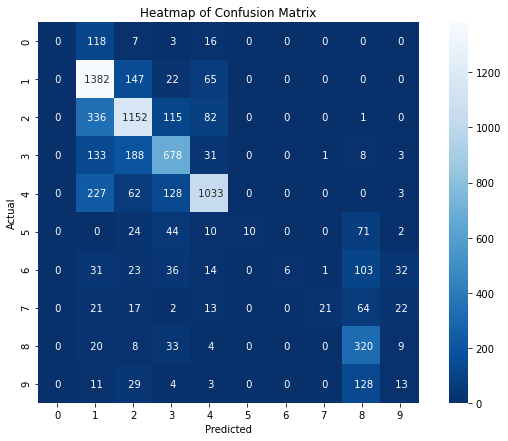

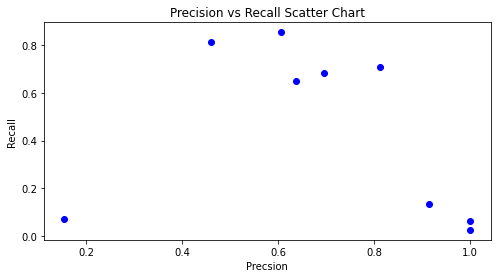

---------------------------------------------------------------------------------------------------------------


In [33]:
neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, hidden_layers=2, neurons=150, l_rate=0.01, epochs=5)       

# Learning Rate (Other Parameters remian Constant)

# Learning Rate = 0.005

Epoch 1/5
178/178 [==============================] - 0s 938us/step - loss: 1.8681 - accuracy: 0.3244
Epoch 2/5
178/178 [==============================] - 0s 1ms/step - loss: 1.7361 - accuracy: 0.4044
Epoch 3/5
178/178 [==============================] - 0s 940us/step - loss: 1.6385 - accuracy: 0.4431
Epoch 4/5
178/178 [==============================] - 0s 936us/step - loss: 1.5408 - accuracy: 0.4698
Epoch 5/5
178/178 [==============================] - 0s 987us/step - loss: 1.4410 - accuracy: 0.5228
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 0s 624us/step - loss: 1.4672 - accuracy: 0.5288
loss of 1.467167615890503; accuracy of 52.877289056777954%


Confusion Matrix:
[[   0  111    8    6   18    0    0    0    1    0]
 [   0 1190  192   94  132    0    0    0    8    0]
 [   0  319  943  131  292    0    0    0    1    0]
 [   0  120  291  376  245    0    0    0   

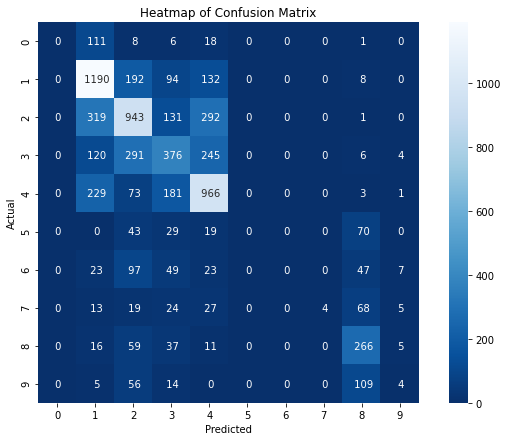

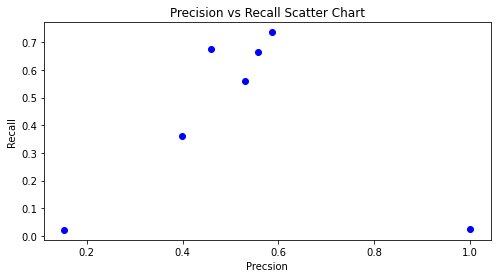

---------------------------------------------------------------------------------------------------------------


In [34]:
neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, hidden_layers=2, neurons=100, l_rate=0.005, epochs=5)

# Learning Rate = 0.01

Epoch 1/5
178/178 [==============================] - 0s 1ms/step - loss: 1.8273 - accuracy: 0.3209
Epoch 2/5
178/178 [==============================] - 0s 936us/step - loss: 1.6309 - accuracy: 0.4330
Epoch 3/5
178/178 [==============================] - 0s 977us/step - loss: 1.4536 - accuracy: 0.5046
Epoch 4/5
178/178 [==============================] - 0s 1ms/step - loss: 1.2981 - accuracy: 0.5612
Epoch 5/5
178/178 [==============================] - 0s 969us/step - loss: 1.1797 - accuracy: 0.5956
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 0s 670us/step - loss: 1.2142 - accuracy: 0.5903
loss of 1.2141540050506592; accuracy of 59.026795625686646%


Confusion Matrix:
[[   0   80   33    1   30    0    0    0    0    0]
 [   0  870  538    4  202    0    0    0    1    1]
 [   0   20 1514   13  139    0    0    0    0    0]
 [   0   20  571  215  217    0    2    0    

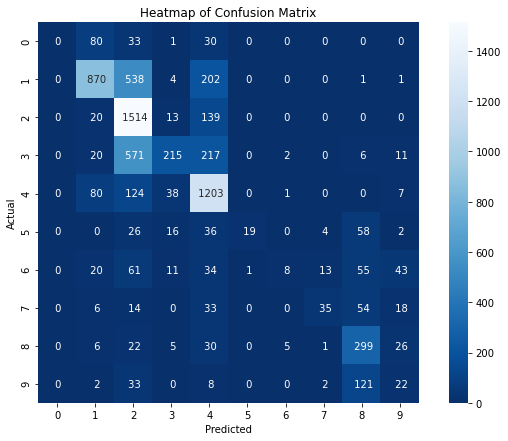

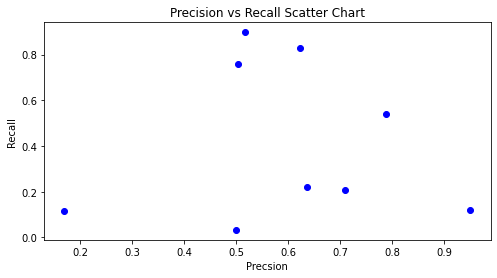

---------------------------------------------------------------------------------------------------------------


In [35]:
neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, hidden_layers=2, neurons=100, l_rate=0.01, epochs=5)

# Learning Rate = 0.02

Epoch 1/5
178/178 [==============================] - 0s 924us/step - loss: 1.7842 - accuracy: 0.3543
Epoch 2/5
178/178 [==============================] - 0s 967us/step - loss: 1.5100 - accuracy: 0.4610
Epoch 3/5
178/178 [==============================] - 0s 953us/step - loss: 1.3138 - accuracy: 0.5214
Epoch 4/5
178/178 [==============================] - 0s 961us/step - loss: 1.1777 - accuracy: 0.5828
Epoch 5/5
178/178 [==============================] - 0s 1ms/step - loss: 1.0543 - accuracy: 0.6504
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 0s 613us/step - loss: 0.9946 - accuracy: 0.6911
loss of 0.9946241974830627; accuracy of 69.11142468452454%


Confusion Matrix:
[[   0  114    5    1   24    0    0    0    0    0]
 [   1 1332  120   20  142    0    0    0    0    1]
 [   0  273 1104   76  232    0    0    1    0    0]
 [   1   89  124  749   71    0    2    5   

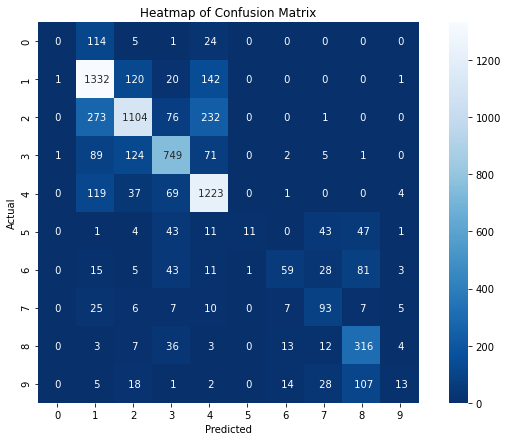

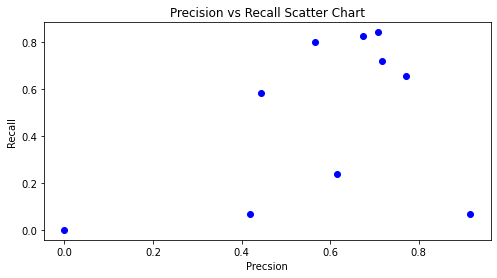

---------------------------------------------------------------------------------------------------------------


In [36]:
neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, hidden_layers=2, neurons=100, l_rate=0.02, epochs=5)

# Epochs (Other Parameters remain Constant)

# Epochs = 5

Epoch 1/5
178/178 [==============================] - 0s 950us/step - loss: 1.8220 - accuracy: 0.3339
Epoch 2/5
178/178 [==============================] - 0s 958us/step - loss: 1.6168 - accuracy: 0.4299
Epoch 3/5
178/178 [==============================] - 0s 1ms/step - loss: 1.4402 - accuracy: 0.5021
Epoch 4/5
178/178 [==============================] - 0s 976us/step - loss: 1.2944 - accuracy: 0.5527
Epoch 5/5
178/178 [==============================] - 0s 952us/step - loss: 1.1745 - accuracy: 0.5933
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 0s 635us/step - loss: 1.2249 - accuracy: 0.5602
loss of 1.2248847484588623; accuracy of 56.02256655693054%


Confusion Matrix:
[[   0  128    3    0   13    0    0    0    0    0]
 [   0 1439   54    5  118    0    0    0    0    0]
 [   0  647  751   25  262    0    0    0    1    0]
 [   1  420  116  246  245    0    0    1   

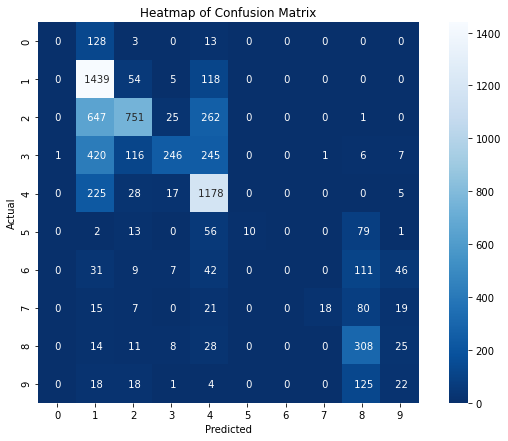

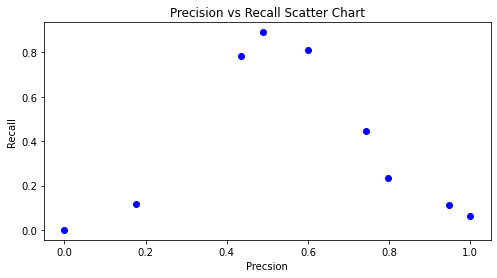

---------------------------------------------------------------------------------------------------------------


In [37]:
neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, hidden_layers=2, neurons=100, l_rate=0.01, epochs=5)

# Epochs = 10

Epoch 1/10
178/178 [==============================] - 0s 985us/step - loss: 1.8222 - accuracy: 0.3413
Epoch 2/10
178/178 [==============================] - 0s 923us/step - loss: 1.6061 - accuracy: 0.4527
Epoch 3/10
178/178 [==============================] - 0s 981us/step - loss: 1.4395 - accuracy: 0.5005
Epoch 4/10
178/178 [==============================] - 0s 952us/step - loss: 1.3083 - accuracy: 0.5388
Epoch 5/10
178/178 [==============================] - 0s 1ms/step - loss: 1.1971 - accuracy: 0.5805
Epoch 6/10
178/178 [==============================] - 0s 948us/step - loss: 1.1022 - accuracy: 0.6148
Epoch 7/10
178/178 [==============================] - 0s 962us/step - loss: 1.0057 - accuracy: 0.6699
Epoch 8/10
178/178 [==============================] - 0s 975us/step - loss: 0.9373 - accuracy: 0.6970
Epoch 9/10
178/178 [==============================] - 0s 951us/step - loss: 0.8610 - accuracy: 0.7297
Epoch 10/10
178/178 [==============================] - 0s 969us/step - loss: 0.8176 

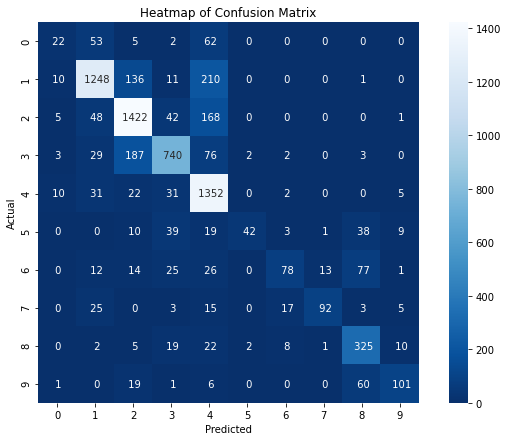

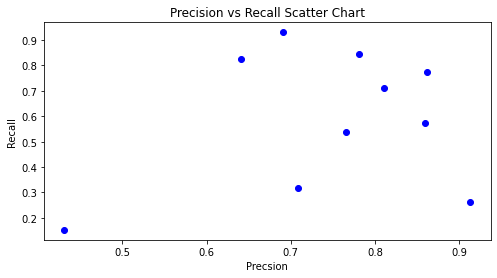

---------------------------------------------------------------------------------------------------------------


In [38]:
neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, hidden_layers=2, neurons=100, l_rate=0.01, epochs=10)

# Convolutional Neural Network

# Varying the Neural Network Parameters

# Learning Rate (Other Parameters remian Constant)

# Learning Rate = 0.005

Epoch 1/5
119/119 [==============================] - 3s 24ms/step - loss: 1.7550 - accuracy: 0.3499
Epoch 2/5
119/119 [==============================] - 3s 23ms/step - loss: 1.2646 - accuracy: 0.5401
Epoch 3/5
119/119 [==============================] - 3s 24ms/step - loss: 0.8811 - accuracy: 0.7058
Epoch 4/5
119/119 [==============================] - 3s 24ms/step - loss: 0.7454 - accuracy: 0.7692
Epoch 5/5
119/119 [==============================] - 3s 25ms/step - loss: 0.5224 - accuracy: 0.8374
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 1s 4ms/step - loss: 0.6102 - accuracy: 0.8395
loss of 0.6102212071418762; accuracy of 83.94922614097595%


Confusion Matrix:
[[  57   53    3    1   30    0    0    0    0    0]
 [   2 1351  156    7   95    0    5    0    0    0]
 [   0   38 1501   51   92    0    4    0    0    0]
 [   0   10   37  948   40    0    6    0    1   

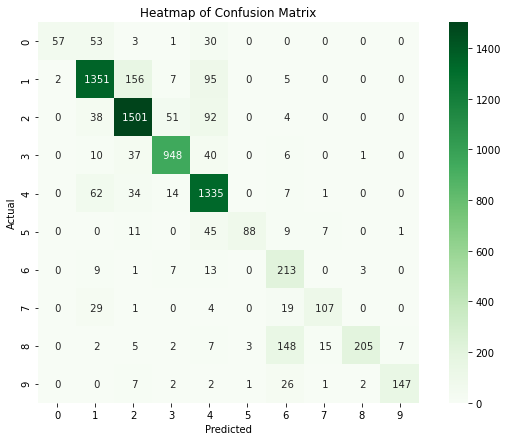

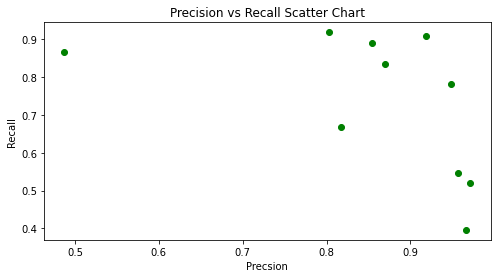

---------------------------------------------------------------------------------------------------------------


In [39]:
conv_neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, l_rate=0.005, epochs=5, momentum=0.9)

# Learning Rate = 0.01

Epoch 1/5
119/119 [==============================] - 3s 25ms/step - loss: 1.6507 - accuracy: 0.3886
Epoch 2/5
119/119 [==============================] - 3s 25ms/step - loss: 0.9780 - accuracy: 0.6664
Epoch 3/5
119/119 [==============================] - 3s 24ms/step - loss: 0.5507 - accuracy: 0.8297
Epoch 4/5
119/119 [==============================] - 3s 24ms/step - loss: 0.3391 - accuracy: 0.9004
Epoch 5/5
119/119 [==============================] - 3s 23ms/step - loss: 0.2450 - accuracy: 0.9330
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 1s 4ms/step - loss: 0.4354 - accuracy: 0.8810
loss of 0.4354008734226227; accuracy of 88.09590935707092%


Confusion Matrix:
[[  85   55    0    3    1    0    0    0    0    0]
 [   0 1527   41   28   14    0    3    0    3    0]
 [   1  204 1336  125   15    0    1    0    2    2]
 [   0   24   23  986    7    0    2    0    0   

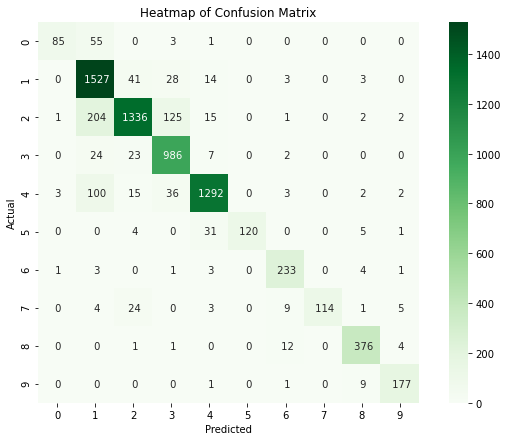

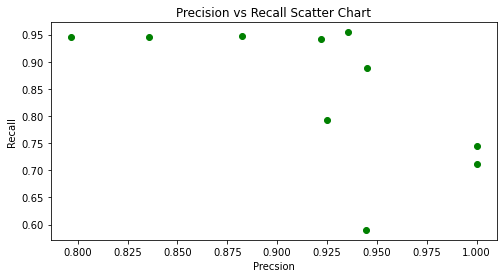

---------------------------------------------------------------------------------------------------------------


In [40]:
conv_neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, l_rate=0.01, epochs=5, momentum=0.9)

# Learning Rate = 0.02

Epoch 1/5
119/119 [==============================] - 3s 24ms/step - loss: 1.4868 - accuracy: 0.4576
Epoch 2/5
119/119 [==============================] - 3s 23ms/step - loss: 0.4874 - accuracy: 0.8483
Epoch 3/5
119/119 [==============================] - 3s 24ms/step - loss: 0.2215 - accuracy: 0.9362
Epoch 4/5
119/119 [==============================] - 3s 24ms/step - loss: 0.1390 - accuracy: 0.9629
Epoch 5/5
119/119 [==============================] - 3s 24ms/step - loss: 0.1216 - accuracy: 0.9659
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 1s 4ms/step - loss: 0.3375 - accuracy: 0.8982
loss of 0.33754536509513855; accuracy of 89.81664180755615%


Confusion Matrix:
[[  67   76    1    0    0    0    0    0    0    0]
 [   0 1589   22    2    1    0    2    0    0    0]
 [   1  261 1402   19    2    0    1    0    0    0]
 [   0   44   13  979    0    0    6    0    0  

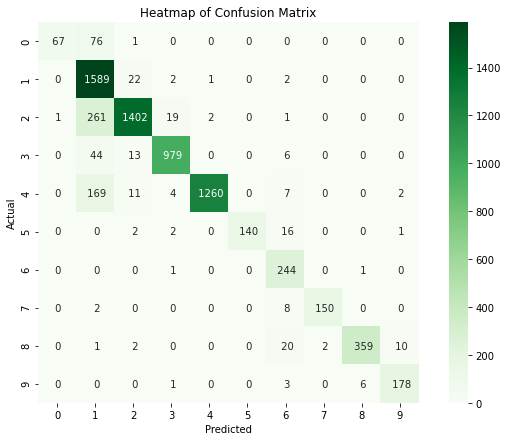

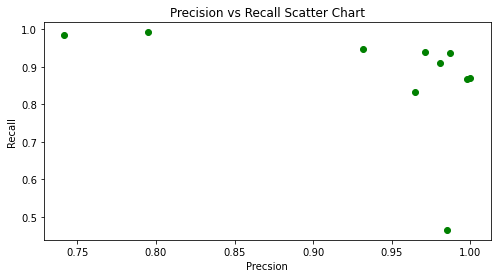

---------------------------------------------------------------------------------------------------------------


In [41]:
conv_neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, l_rate=0.02, epochs=5, momentum=0.9)

# Epochs (Other Parameters remain Constant)

# Epochs = 5

Epoch 1/5
119/119 [==============================] - 3s 24ms/step - loss: 1.6439 - accuracy: 0.3907
Epoch 2/5
119/119 [==============================] - 3s 24ms/step - loss: 0.9946 - accuracy: 0.6562
Epoch 3/5
119/119 [==============================] - 3s 24ms/step - loss: 0.5189 - accuracy: 0.8445
Epoch 4/5
119/119 [==============================] - 3s 24ms/step - loss: 0.3417 - accuracy: 0.9025
Epoch 5/5
119/119 [==============================] - 3s 23ms/step - loss: 0.2385 - accuracy: 0.9350
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 1s 4ms/step - loss: 0.3535 - accuracy: 0.8953
loss of 0.35345563292503357; accuracy of 89.53455686569214%


Confusion Matrix:
[[  99   37    0    0    8    0    0    0    0    0]
 [   4 1533   27    2   46    0    2    0    1    1]
 [   1  170 1432   12   69    0    0    0    0    2]
 [   6   35    9  915   69    0    3    1    4  

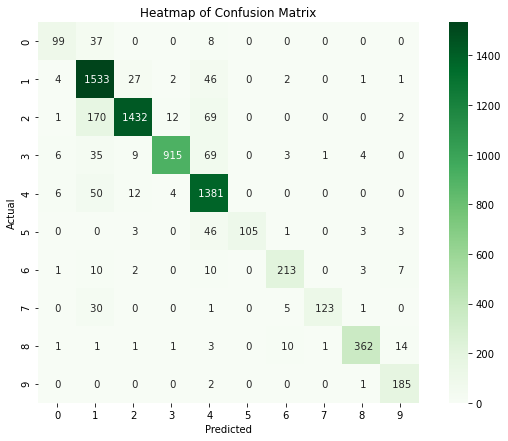

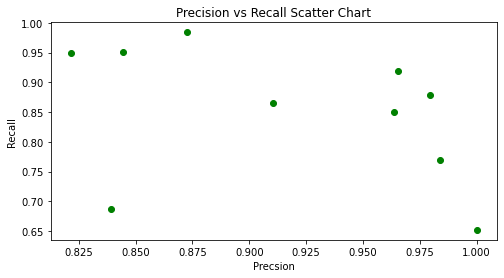

---------------------------------------------------------------------------------------------------------------


In [42]:
conv_neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, l_rate=0.01, epochs=5, momentum=0.9)

# Epochs = 10

Epoch 1/10
119/119 [==============================] - 3s 24ms/step - loss: 1.6517 - accuracy: 0.4051
Epoch 2/10
119/119 [==============================] - 3s 25ms/step - loss: 0.9435 - accuracy: 0.6770
Epoch 3/10
119/119 [==============================] - 3s 24ms/step - loss: 0.5537 - accuracy: 0.8248
Epoch 4/10
119/119 [==============================] - 3s 24ms/step - loss: 0.3119 - accuracy: 0.9116
Epoch 5/10
119/119 [==============================] - 3s 24ms/step - loss: 0.2324 - accuracy: 0.9344
Epoch 6/10
119/119 [==============================] - 3s 24ms/step - loss: 0.1638 - accuracy: 0.9548
Epoch 7/10
119/119 [==============================] - 3s 24ms/step - loss: 0.1224 - accuracy: 0.9677
Epoch 8/10
119/119 [==============================] - 3s 25ms/step - loss: 0.0977 - accuracy: 0.9750
Epoch 9/10
119/119 [==============================] - 3s 26ms/step - loss: 0.0846 - accuracy: 0.9793
Epoch 10/10
119/119 [==============================] - 3s 27ms/step - loss: 0.0636 - accura

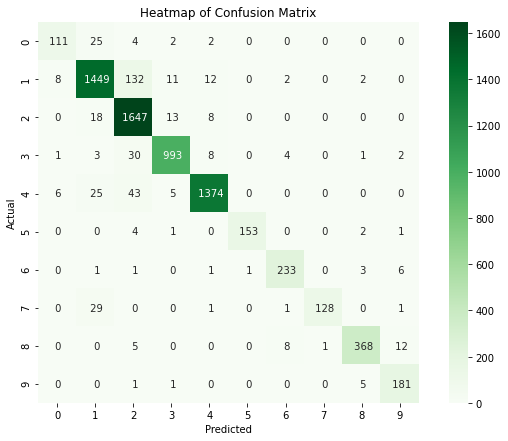

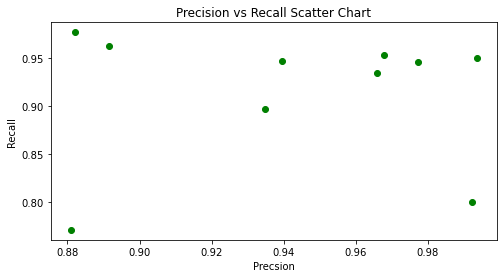

---------------------------------------------------------------------------------------------------------------


In [43]:
conv_neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, l_rate=0.01, epochs=10, momentum=0.9)

# Momentum (Other Parameters remain Constant)

# Momentum = 0.5

Epoch 1/5
119/119 [==============================] - 3s 24ms/step - loss: 1.8161 - accuracy: 0.3258
Epoch 2/5
119/119 [==============================] - 3s 26ms/step - loss: 1.5441 - accuracy: 0.4114
Epoch 3/5
119/119 [==============================] - 3s 27ms/step - loss: 1.3216 - accuracy: 0.5090
Epoch 4/5
119/119 [==============================] - 3s 27ms/step - loss: 1.1063 - accuracy: 0.6111
Epoch 5/5
119/119 [==============================] - 3s 26ms/step - loss: 0.9766 - accuracy: 0.6815
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 1s 4ms/step - loss: 0.9101 - accuracy: 0.7439
loss of 0.9100579023361206; accuracy of 74.38645958900452%


Confusion Matrix:
[[   6  100    7    4   27    0    0    0    0    0]
 [   1 1165  215   87  145    0    0    0    2    1]
 [   0   28 1335  224   98    0    1    0    0    0]
 [   0   15  119  863   36    0    5    2    2   

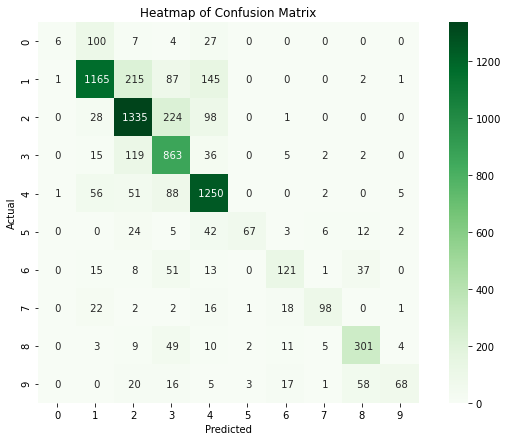

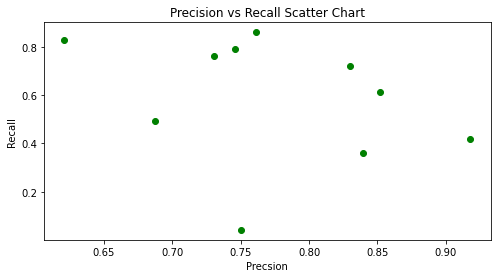

---------------------------------------------------------------------------------------------------------------


In [44]:
conv_neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, l_rate=0.01, epochs=5, momentum=0.5)

# Momentum = 0.7

Epoch 1/5
119/119 [==============================] - 3s 24ms/step - loss: 1.7480 - accuracy: 0.3499
Epoch 2/5
119/119 [==============================] - 3s 26ms/step - loss: 1.3430 - accuracy: 0.5130
Epoch 3/5
119/119 [==============================] - 3s 26ms/step - loss: 1.0683 - accuracy: 0.6350
Epoch 4/5
119/119 [==============================] - 3s 26ms/step - loss: 0.8534 - accuracy: 0.7206
Epoch 5/5
119/119 [==============================] - 3s 25ms/step - loss: 0.6943 - accuracy: 0.7842
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 1s 4ms/step - loss: 0.7893 - accuracy: 0.7838
loss of 0.7892800569534302; accuracy of 78.37799787521362%


Confusion Matrix:
[[  24   86    5    2   27    0    0    0    0    0]
 [   1 1353  153   16   79    1    0    0    3   10]
 [   0   62 1434   79   93    6    0    0    0   12]
 [   0   49  168  728   64    0    0    0    5   

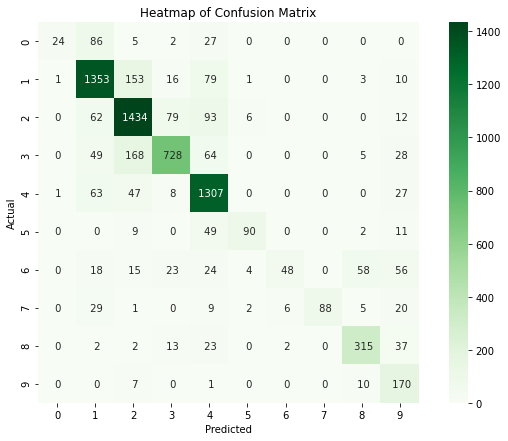

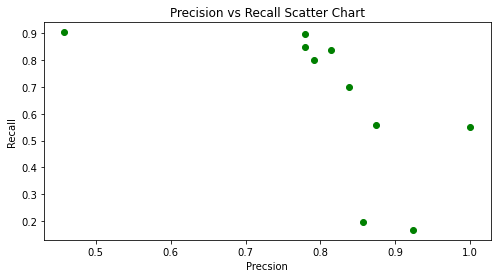

---------------------------------------------------------------------------------------------------------------


In [45]:
conv_neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, l_rate=0.01, epochs=5, momentum=0.7)

# Momentum = 0.9

Epoch 1/5
119/119 [==============================] - 3s 25ms/step - loss: 1.6830 - accuracy: 0.3643
Epoch 2/5
119/119 [==============================] - 3s 26ms/step - loss: 0.9737 - accuracy: 0.6589
Epoch 3/5
119/119 [==============================] - 3s 27ms/step - loss: 0.5195 - accuracy: 0.8397
Epoch 4/5
119/119 [==============================] - 3s 27ms/step - loss: 0.3254 - accuracy: 0.9072
Epoch 5/5
119/119 [==============================] - 3s 27ms/step - loss: 0.2233 - accuracy: 0.9366
---------------------------------------------------------------------------------------------------------------


Results


222/222 [==============================] - 1s 4ms/step - loss: 0.3372 - accuracy: 0.9078
loss of 0.33722689747810364; accuracy of 90.77574014663696%


Confusion Matrix:
[[  93   37    1    3   10    0    0    0    0    0]
 [   3 1482   63   22   42    0    1    0    3    0]
 [   0   56 1557   48   25    0    0    0    0    0]
 [   0   11   33  987    5    0    2    0    4  

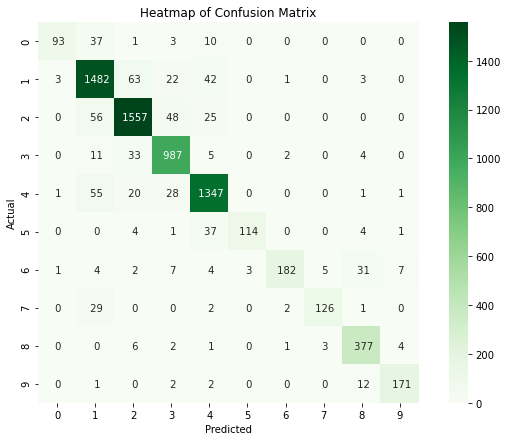

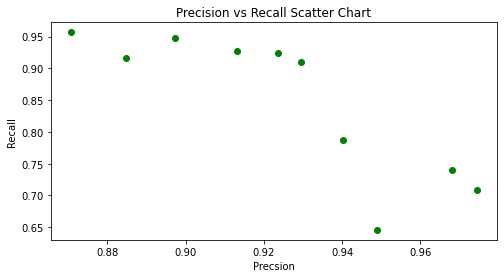

---------------------------------------------------------------------------------------------------------------


In [46]:
conv_neural_network(x_train_4000, y_train_4000, x_test_4000, y_test_4000, l_rate=0.01, epochs=5, momentum=0.9)

# 9000 Data Sets 

# Linear Classifier

In [47]:
linear_classifier(x_train_9000, y_train_9000, x_test_9000, y_test_9000)

Score of Linear Classifier: 0.5186931348221671


# Multi-Layer Perceptron

# Varying the Neural Network Parameters

# Hidden Layers (Other Parameters remain Constant)

# 1 Hidden Layer

Epoch 1/5
22/22 [==============================] - 0s 1ms/step - loss: 2.0491 - accuracy: 0.2159
Epoch 2/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8957 - accuracy: 0.3043
Epoch 3/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8320 - accuracy: 0.3420
Epoch 4/5
22/22 [==============================] - 0s 999us/step - loss: 1.7870 - accuracy: 0.3565
Epoch 5/5
22/22 [==============================] - 0s 994us/step - loss: 1.7624 - accuracy: 0.3565
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 0s 616us/step - loss: 1.7470 - accuracy: 0.4152
loss of 1.7469538450241089; accuracy of 41.52191877365112%


Confusion Matrix:
[[   0  219   14    5   14    0    0    0    0    0]
 [   0 2101  294   63  340    0    0    0    0    0]
 [   1 1005  975  183  679    0    0    0    0    0]
 [   1  663  314  469  300    0    0    0    7    0]
 [   

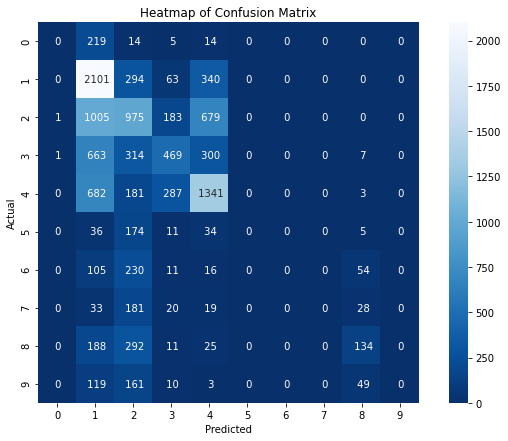

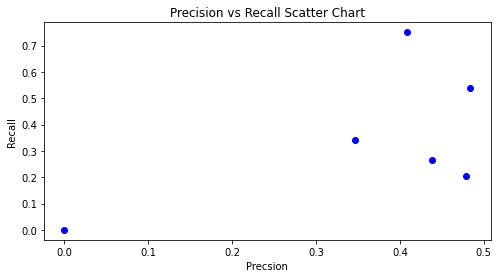

---------------------------------------------------------------------------------------------------------------


In [48]:
neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, hidden_layers=1, neurons=100, l_rate=0.01, epochs=5)

# 2 Hidden Layers

Epoch 1/5
22/22 [==============================] - 0s 986us/step - loss: 2.0555 - accuracy: 0.2217
Epoch 2/5
22/22 [==============================] - 0s 1ms/step - loss: 1.9087 - accuracy: 0.2913
Epoch 3/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8543 - accuracy: 0.3203
Epoch 4/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8243 - accuracy: 0.3290
Epoch 5/5
22/22 [==============================] - 0s 1ms/step - loss: 1.7894 - accuracy: 0.3754
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 0s 701us/step - loss: 1.7865 - accuracy: 0.3801
loss of 1.7865489721298218; accuracy of 38.00661563873291%


Confusion Matrix:
[[   0  163   62   11   16    0    0    0    0    0]
 [   0 1416  794  130  458    0    0    0    0    0]
 [   0  648 1209  229  757    0    0    0    0    0]
 [   0  363  470  558  360    0    0    0    3    0]
 [   0 

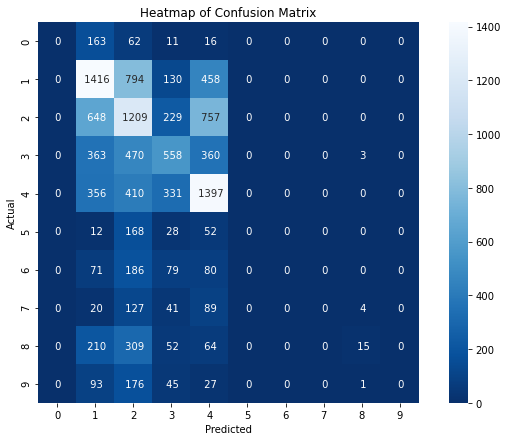

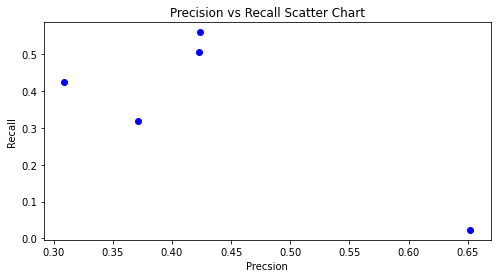

---------------------------------------------------------------------------------------------------------------


In [49]:
neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, hidden_layers=2, neurons=100, l_rate=0.01, epochs=5)

# 4 Hidden Layers

Epoch 1/5
22/22 [==============================] - 0s 1ms/step - loss: 2.2569 - accuracy: 0.1377
Epoch 2/5
22/22 [==============================] - 0s 1ms/step - loss: 2.0924 - accuracy: 0.2101
Epoch 3/5
22/22 [==============================] - 0s 1ms/step - loss: 1.9811 - accuracy: 0.2304
Epoch 4/5
22/22 [==============================] - 0s 1ms/step - loss: 1.9311 - accuracy: 0.2667
Epoch 5/5
22/22 [==============================] - 0s 1ms/step - loss: 1.9092 - accuracy: 0.2826
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 0s 774us/step - loss: 1.8862 - accuracy: 0.2747
loss of 1.8861947059631348; accuracy of 27.468982338905334%


Confusion Matrix:
[[   0  252    0    0    0    0    0    0    0    0]
 [   0 2773    5    0   20    0    0    0    0    0]
 [   0 2723   45    0   75    0    0    0    0    0]
 [   0 1533   21   54  146    0    0    0    0    0]
 [   0 1

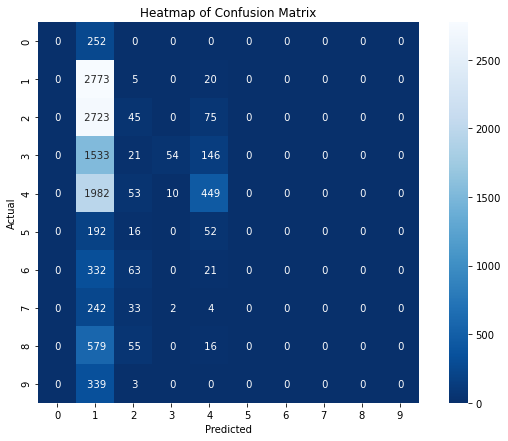

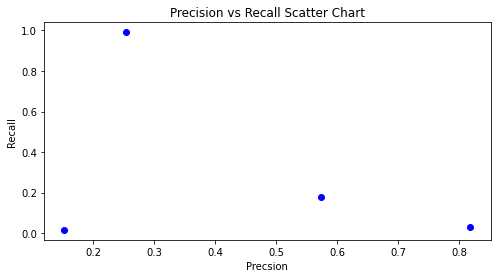

---------------------------------------------------------------------------------------------------------------


In [50]:
neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, hidden_layers=4, neurons=100, l_rate=0.01, epochs=5)

# Neurons in Hidden Layers (Other Parameters remain Constant)

# 50 Neurons

Epoch 1/5
22/22 [==============================] - 0s 835us/step - loss: 2.1262 - accuracy: 0.2246
Epoch 2/5
22/22 [==============================] - 0s 924us/step - loss: 1.9619 - accuracy: 0.2594
Epoch 3/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8994 - accuracy: 0.2841
Epoch 4/5
22/22 [==============================] - 0s 983us/step - loss: 1.8534 - accuracy: 0.3319
Epoch 5/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8253 - accuracy: 0.3594
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 0s 550us/step - loss: 1.8230 - accuracy: 0.3548
loss of 1.8229923248291016; accuracy of 35.48386991024017%


Confusion Matrix:
[[   0   99  131   14    8    0    0    0    0    0]
 [   0  933 1550  111  204    0    0    0    0    0]
 [   0  336 2223  185   99    0    0    0    0    0]
 [   0  288  870  496  100    0    0    0    0    0]
 [ 

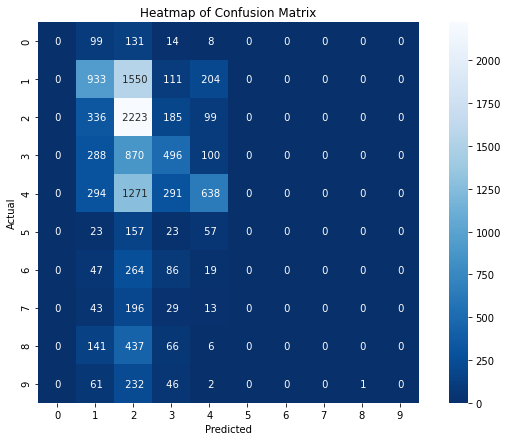

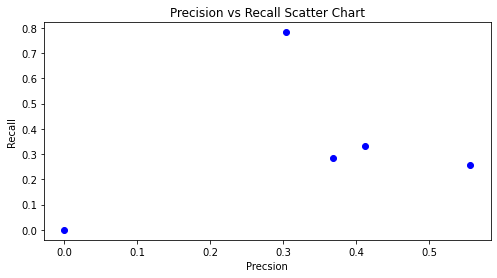

---------------------------------------------------------------------------------------------------------------


In [51]:
neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, hidden_layers=2, neurons=50, l_rate=0.01, epochs=5)

# 100 Neurons

Epoch 1/5
22/22 [==============================] - 0s 1ms/step - loss: 2.0886 - accuracy: 0.2304
Epoch 2/5
22/22 [==============================] - 0s 1ms/step - loss: 1.9417 - accuracy: 0.2319
Epoch 3/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8885 - accuracy: 0.2928
Epoch 4/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8501 - accuracy: 0.3304
Epoch 5/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8257 - accuracy: 0.3406
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 0s 631us/step - loss: 1.8755 - accuracy: 0.2726
loss of 1.8754644393920898; accuracy of 27.26219892501831%


Confusion Matrix:
[[   0    1  247    4    0    0    0    0    0    0]
 [   0   17 2721   37   23    0    0    0    0    0]
 [   0    9 2692  117   25    0    0    0    0    0]
 [   0    9 1364  379    2    0    0    0    0    0]
 [   0   

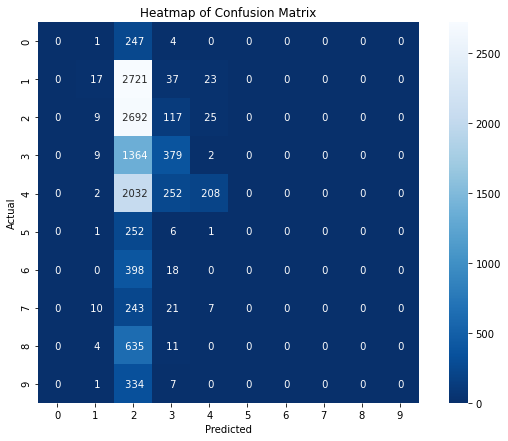

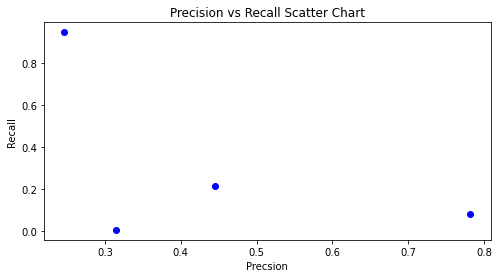

---------------------------------------------------------------------------------------------------------------


In [52]:
neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, hidden_layers=2, neurons=100, l_rate=0.01, epochs=5)

# 150 Neurons

Epoch 1/5
22/22 [==============================] - 0s 1ms/step - loss: 2.0864 - accuracy: 0.2261
Epoch 2/5
22/22 [==============================] - 0s 1ms/step - loss: 1.9087 - accuracy: 0.3000
Epoch 3/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8523 - accuracy: 0.3290
Epoch 4/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8213 - accuracy: 0.3449
Epoch 5/5
22/22 [==============================] - 0s 1ms/step - loss: 1.7877 - accuracy: 0.3652
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 0s 767us/step - loss: 1.8035 - accuracy: 0.3104
loss of 1.8035268783569336; accuracy of 31.042182445526123%


Confusion Matrix:
[[   0   56  189    7    0    0    0    0    0    0]
 [   0  465 2237   88    8    0    0    0    0    0]
 [   0   66 2552  183   42    0    0    0    0    0]
 [   0   51 1233  461    9    0    0    0    0    0]
 [   0  

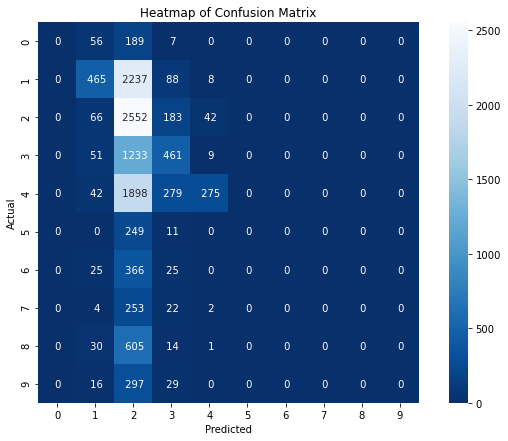

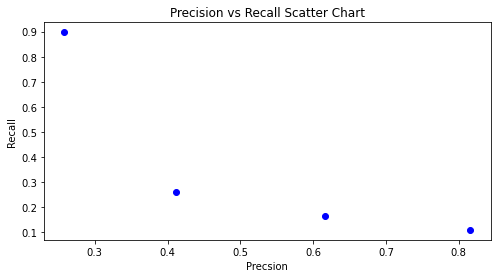

---------------------------------------------------------------------------------------------------------------


In [53]:
neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, hidden_layers=2, neurons=150, l_rate=0.01, epochs=5)       

# Learning Rate (Other Parameters remian Constant)

# Learning Rate = 0.005

Epoch 1/5
22/22 [==============================] - 0s 1ms/step - loss: 2.1049 - accuracy: 0.1957
Epoch 2/5
22/22 [==============================] - 0s 1ms/step - loss: 1.9770 - accuracy: 0.2145
Epoch 3/5
22/22 [==============================] - 0s 1ms/step - loss: 1.9247 - accuracy: 0.2493
Epoch 4/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8909 - accuracy: 0.2551
Epoch 5/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8593 - accuracy: 0.3536
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 0s 660us/step - loss: 1.8514 - accuracy: 0.2994
loss of 1.8514277935028076; accuracy of 29.94210124015808%


Confusion Matrix:
[[   0  123  128    1    0    0    0    0    0    0]
 [   0 1013 1755   29    1    0    0    0    0    0]
 [   0  471 2252  117    3    0    0    0    0    0]
 [   0  442  967  344    1    0    0    0    0    0]
 [   0  3

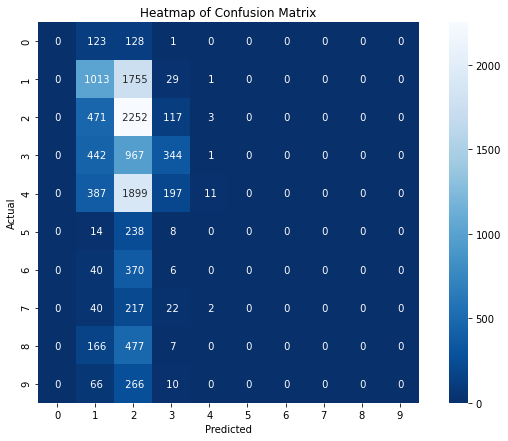

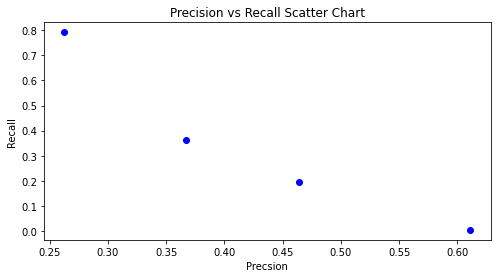

---------------------------------------------------------------------------------------------------------------


In [54]:
neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, hidden_layers=2, neurons=100, l_rate=0.005, epochs=5)

# Learning Rate = 0.01

Epoch 1/5
22/22 [==============================] - 0s 2ms/step - loss: 2.0620 - accuracy: 0.2217
Epoch 2/5
22/22 [==============================] - 0s 1ms/step - loss: 1.9378 - accuracy: 0.2783
Epoch 3/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8821 - accuracy: 0.3014
Epoch 4/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8437 - accuracy: 0.3420
Epoch 5/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8161 - accuracy: 0.3594
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 0s 648us/step - loss: 1.8349 - accuracy: 0.2964
loss of 1.8348522186279297; accuracy of 29.644334316253662%


Confusion Matrix:
[[   0  109   12    8  123    0    0    0    0    0]
 [   0  674  183  128 1813    0    0    0    0    0]
 [   0  182  274  212 2175    0    0    0    0    0]
 [   0  106   78  502 1068    0    0    0    0    0]
 [   0  

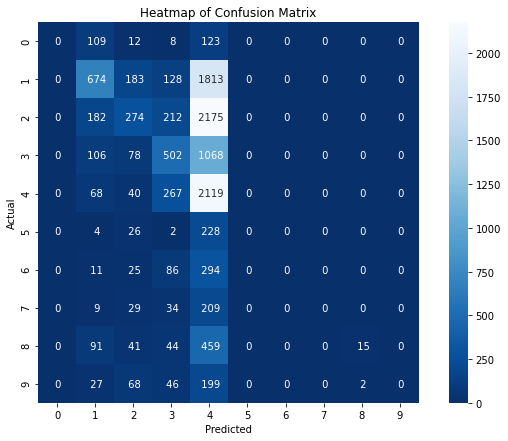

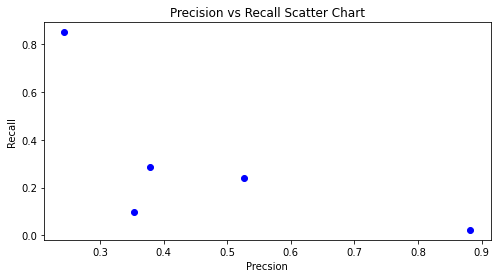

---------------------------------------------------------------------------------------------------------------


In [55]:
neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, hidden_layers=2, neurons=100, l_rate=0.01, epochs=5)

# Learning Rate = 0.02

Epoch 1/5
22/22 [==============================] - 0s 1ms/step - loss: 2.0282 - accuracy: 0.2159
Epoch 2/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8864 - accuracy: 0.2681
Epoch 3/5
22/22 [==============================] - 0s 2ms/step - loss: 1.8095 - accuracy: 0.3217
Epoch 4/5
22/22 [==============================] - 0s 1ms/step - loss: 1.7583 - accuracy: 0.3333
Epoch 5/5
22/22 [==============================] - 0s 1ms/step - loss: 1.7324 - accuracy: 0.3493
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 0s 726us/step - loss: 1.7154 - accuracy: 0.3776
loss of 1.7153741121292114; accuracy of 37.75847852230072%


Confusion Matrix:
[[   0   66  159    9   18    0    0    0    0    0]
 [   0  273 2084  138  302    0    0    0    1    0]
 [   0   75 2130  229  408    0    0    0    1    0]
 [   0   47  781  544  375    0    0    0    7    0]
 [   0   

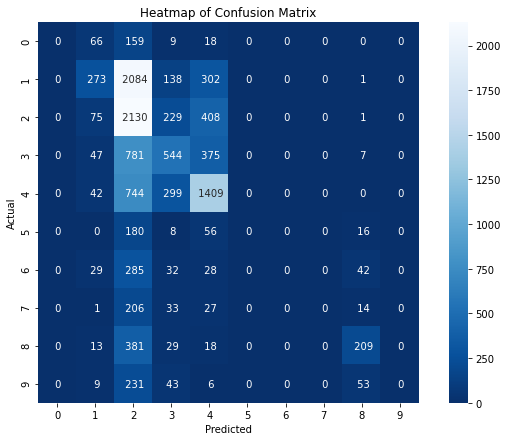

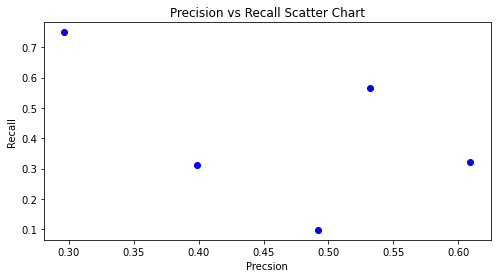

---------------------------------------------------------------------------------------------------------------


In [56]:
neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, hidden_layers=2, neurons=100, l_rate=0.02, epochs=5)

# Epochs (Other Parameters remain Constant)

# Epochs = 5

Epoch 1/5
22/22 [==============================] - 0s 1ms/step - loss: 2.1247 - accuracy: 0.2536
Epoch 2/5
22/22 [==============================] - 0s 1ms/step - loss: 1.9271 - accuracy: 0.2783
Epoch 3/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8689 - accuracy: 0.3217
Epoch 4/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8328 - accuracy: 0.3246
Epoch 5/5
22/22 [==============================] - 0s 1ms/step - loss: 1.8129 - accuracy: 0.3435
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 0s 689us/step - loss: 1.8383 - accuracy: 0.3366
loss of 1.838291049003601; accuracy of 33.655914664268494%


Confusion Matrix:
[[   0  220    0    6   26    0    0    0    0    0]
 [   0 2030   10   64  694    0    0    0    0    0]
 [   0 1395   15  120 1313    0    0    0    0    0]
 [   0  672    5  407  670    0    0    0    0    0]
 [   0  6

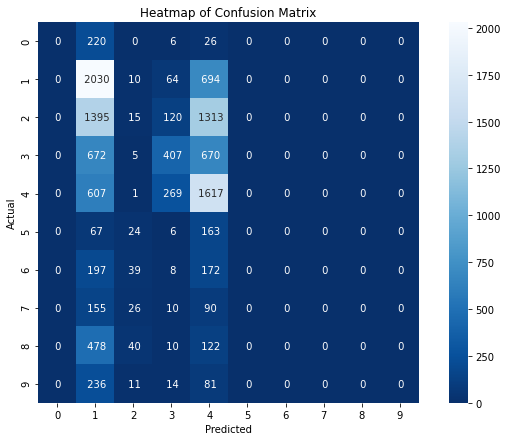

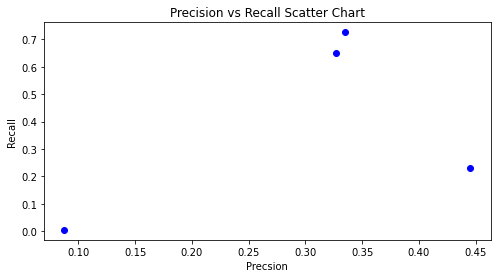

---------------------------------------------------------------------------------------------------------------


In [57]:
neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, hidden_layers=2, neurons=100, l_rate=0.01, epochs=5)

# Epochs = 10

Epoch 1/10
22/22 [==============================] - 0s 1ms/step - loss: 2.0880 - accuracy: 0.2014
Epoch 2/10
22/22 [==============================] - 0s 1ms/step - loss: 1.9343 - accuracy: 0.2667
Epoch 3/10
22/22 [==============================] - 0s 1ms/step - loss: 1.8823 - accuracy: 0.2928
Epoch 4/10
22/22 [==============================] - 0s 1ms/step - loss: 1.8320 - accuracy: 0.3507
Epoch 5/10
22/22 [==============================] - 0s 1ms/step - loss: 1.7979 - accuracy: 0.3391
Epoch 6/10
22/22 [==============================] - 0s 1ms/step - loss: 1.7712 - accuracy: 0.3609
Epoch 7/10
22/22 [==============================] - 0s 1ms/step - loss: 1.7427 - accuracy: 0.3870
Epoch 8/10
22/22 [==============================] - 0s 1ms/step - loss: 1.7111 - accuracy: 0.4058
Epoch 9/10
22/22 [==============================] - 0s 1ms/step - loss: 1.6907 - accuracy: 0.4130
Epoch 10/10
22/22 [==============================] - 0s 1ms/step - loss: 1.6579 - accuracy: 0.4246
-------------------

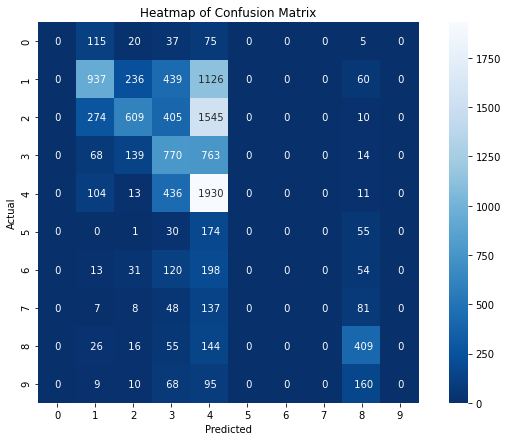

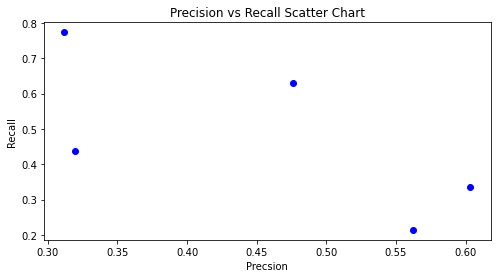

---------------------------------------------------------------------------------------------------------------


In [58]:
neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, hidden_layers=2, neurons=100, l_rate=0.01, epochs=10)

# Convolutional Neural Network

# Varying the Neural Network Parameters

# Learning Rate (Other Parameters remian Constant)

# Learning Rate = 0.005

Epoch 1/5
15/15 [==============================] - 0s 22ms/step - loss: 2.0691 - accuracy: 0.2072
Epoch 2/5
15/15 [==============================] - 0s 23ms/step - loss: 1.9082 - accuracy: 0.2696
Epoch 3/5
15/15 [==============================] - 0s 22ms/step - loss: 1.8462 - accuracy: 0.3174
Epoch 4/5
15/15 [==============================] - 0s 23ms/step - loss: 1.7557 - accuracy: 0.3333
Epoch 5/5
15/15 [==============================] - 0s 22ms/step - loss: 1.6992 - accuracy: 0.3377
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 1s 4ms/step - loss: 1.7173 - accuracy: 0.3353
loss of 1.7173268795013428; accuracy of 33.53184461593628%


Confusion Matrix:
[[   0  225    0    2   25    0    0    0    0    0]
 [   0 1977   16  234  571    0    0    0    0    0]
 [   0 1222   59  394 1168    0    0    0    0    0]
 [   0  261    7  872  607    0    0    0    7    0]
 [   0

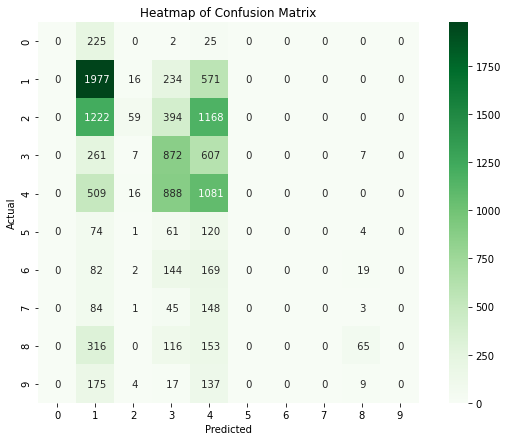

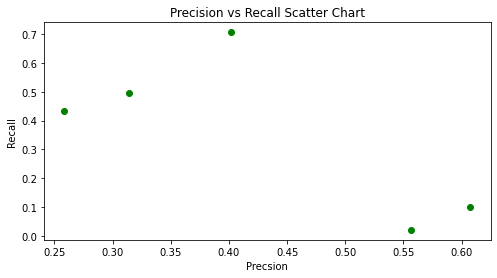

---------------------------------------------------------------------------------------------------------------


In [59]:
conv_neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, l_rate=0.005, epochs=5, momentum=0.9)

# Learning Rate = 0.01

Epoch 1/5
15/15 [==============================] - 0s 22ms/step - loss: 2.0470 - accuracy: 0.2551
Epoch 2/5
15/15 [==============================] - 0s 22ms/step - loss: 1.9228 - accuracy: 0.2899
Epoch 3/5
15/15 [==============================] - 0s 22ms/step - loss: 1.7531 - accuracy: 0.3362
Epoch 4/5
15/15 [==============================] - 0s 22ms/step - loss: 1.6716 - accuracy: 0.3594
Epoch 5/5
15/15 [==============================] - 0s 23ms/step - loss: 1.5440 - accuracy: 0.3797
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 1s 4ms/step - loss: 1.5456 - accuracy: 0.4356
loss of 1.5455653667449951; accuracy of 43.55665743350983%


Confusion Matrix:
[[  35  151    5   26   34    0    0    0    1    0]
 [  46 1582  178  420  566    0    0    0    6    0]
 [  42  473  857  546  923    0    0    0    2    0]
 [  11   89  118 1093  441    0    0    0    2    0]
 [   4

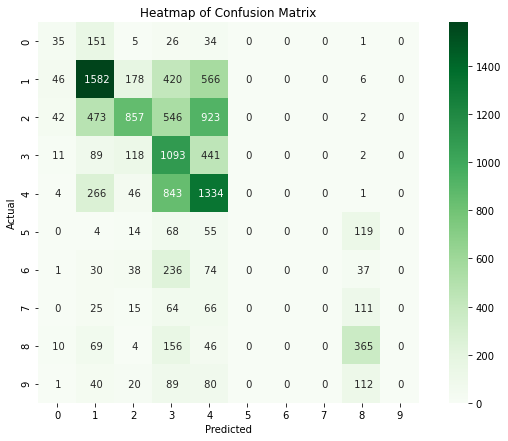

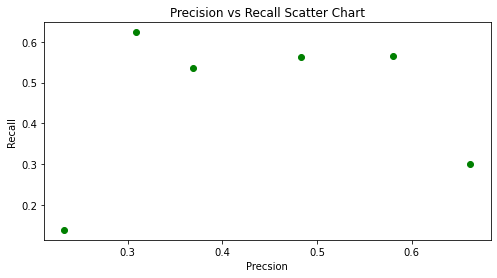

---------------------------------------------------------------------------------------------------------------


In [60]:
conv_neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, l_rate=0.01, epochs=5, momentum=0.9)

# Learning Rate = 0.02

Epoch 1/5
15/15 [==============================] - 0s 23ms/step - loss: 2.1286 - accuracy: 0.2304
Epoch 2/5
15/15 [==============================] - 0s 22ms/step - loss: 1.8838 - accuracy: 0.3029
Epoch 3/5
15/15 [==============================] - 0s 22ms/step - loss: 1.7655 - accuracy: 0.3362
Epoch 4/5
15/15 [==============================] - 0s 22ms/step - loss: 1.6207 - accuracy: 0.3681
Epoch 5/5
15/15 [==============================] - 0s 23ms/step - loss: 1.4017 - accuracy: 0.4826
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 1s 4ms/step - loss: 1.5914 - accuracy: 0.3945
loss of 1.5913716554641724; accuracy of 39.445823431015015%


Confusion Matrix:
[[  45    1   64    5  137    0    0    0    0    0]
 [  52  102 1194  221 1225    0    0    0    1    3]
 [  12    0 1736  478  615    0    1    0    1    0]
 [   2    7  338  889  506    0   12    0    0    0]
 [   

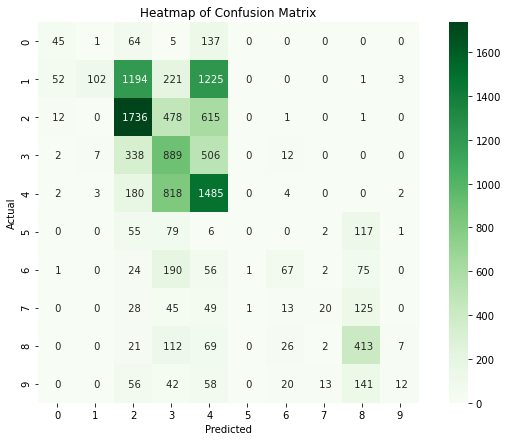

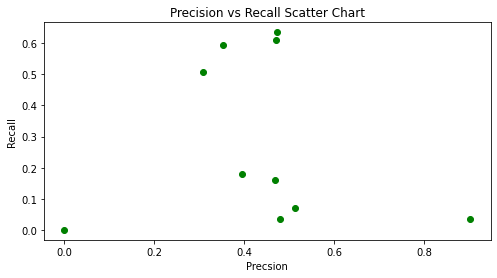

---------------------------------------------------------------------------------------------------------------


In [61]:
conv_neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, l_rate=0.02, epochs=5, momentum=0.9)

# Epochs (Other Parameters remain Constant)

# Epochs = 5

Epoch 1/5
15/15 [==============================] - 0s 22ms/step - loss: 2.0551 - accuracy: 0.1957
Epoch 2/5
15/15 [==============================] - 0s 23ms/step - loss: 1.9045 - accuracy: 0.2855
Epoch 3/5
15/15 [==============================] - 0s 21ms/step - loss: 1.7567 - accuracy: 0.3014
Epoch 4/5
15/15 [==============================] - 0s 22ms/step - loss: 1.6437 - accuracy: 0.3638
Epoch 5/5
15/15 [==============================] - 0s 23ms/step - loss: 1.5288 - accuracy: 0.4203
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 1s 4ms/step - loss: 1.5282 - accuracy: 0.4298
loss of 1.5282435417175293; accuracy of 42.9776668548584%


Confusion Matrix:
[[  14  107  102   22    7    0    0    0    0    0]
 [  18 1023 1133  390  229    0    0    0    5    0]
 [  19   99 1937  608  180    0    0    0    0    0]
 [   0   69  410 1113  160    0    0    0    2    0]
 [   3 

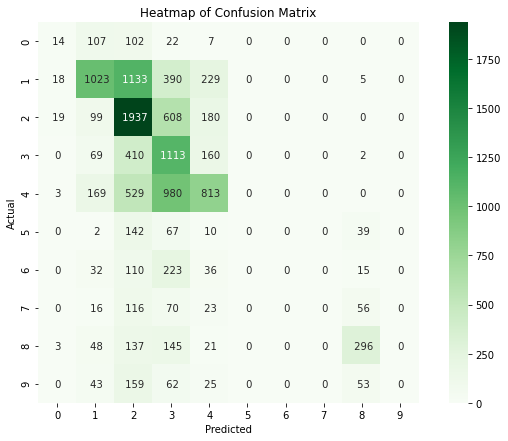

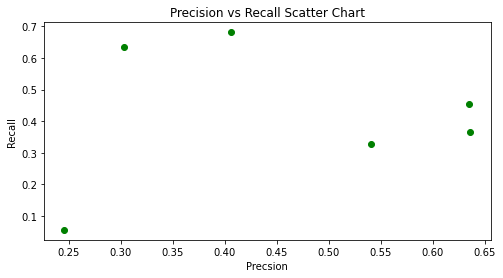

---------------------------------------------------------------------------------------------------------------


In [62]:
conv_neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, l_rate=0.01, epochs=5, momentum=0.9)

# Epochs = 10

Epoch 1/10
15/15 [==============================] - 0s 21ms/step - loss: 2.0092 - accuracy: 0.2348
Epoch 2/10
15/15 [==============================] - 0s 23ms/step - loss: 1.8895 - accuracy: 0.2725
Epoch 3/10
15/15 [==============================] - 0s 23ms/step - loss: 1.7966 - accuracy: 0.3507
Epoch 4/10
15/15 [==============================] - 0s 22ms/step - loss: 1.6751 - accuracy: 0.3841
Epoch 5/10
15/15 [==============================] - 0s 21ms/step - loss: 1.5249 - accuracy: 0.4319
Epoch 6/10
15/15 [==============================] - 0s 21ms/step - loss: 1.4117 - accuracy: 0.5029
Epoch 7/10
15/15 [==============================] - 0s 22ms/step - loss: 1.2814 - accuracy: 0.5464
Epoch 8/10
15/15 [==============================] - 0s 23ms/step - loss: 1.1674 - accuracy: 0.5841
Epoch 9/10
15/15 [==============================] - 0s 22ms/step - loss: 1.0827 - accuracy: 0.6319
Epoch 10/10
15/15 [==============================] - 0s 23ms/step - loss: 1.0149 - accuracy: 0.6362
---------

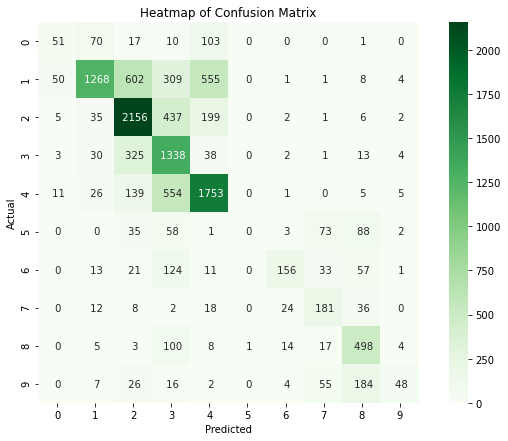

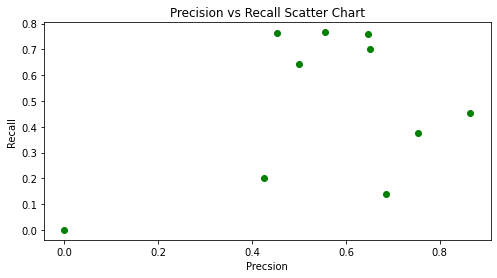

---------------------------------------------------------------------------------------------------------------


In [63]:
conv_neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, l_rate=0.01, epochs=10, momentum=0.9)

# Momentum (Other Parameters remain Constant)

# Momentum = 0.5

Epoch 1/5
15/15 [==============================] - 0s 22ms/step - loss: 2.0413 - accuracy: 0.2290
Epoch 2/5
15/15 [==============================] - 0s 22ms/step - loss: 1.9093 - accuracy: 0.2841
Epoch 3/5
15/15 [==============================] - 0s 23ms/step - loss: 1.8689 - accuracy: 0.3159
Epoch 4/5
15/15 [==============================] - 0s 22ms/step - loss: 1.8441 - accuracy: 0.3159
Epoch 5/5
15/15 [==============================] - 0s 22ms/step - loss: 1.7760 - accuracy: 0.3696
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 1s 4ms/step - loss: 1.7966 - accuracy: 0.3252
loss of 1.796632170677185; accuracy of 32.52274692058563%


Confusion Matrix:
[[   0  111   13   22  106    0    0    0    0    0]
 [   0 1040   78  262 1418    0    0    0    0    0]
 [   0  409  155  348 1931    0    0    0    0    0]
 [   0   86   22  664  976    0    0    0    6    0]
 [   0 

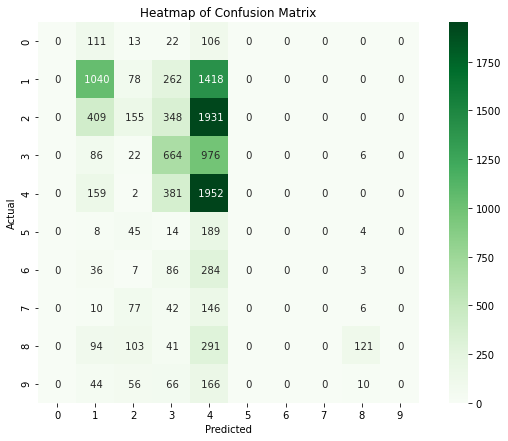

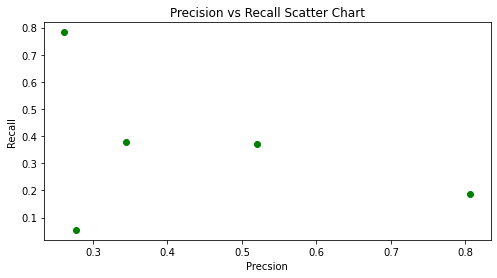

---------------------------------------------------------------------------------------------------------------


In [64]:
conv_neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, l_rate=0.01, epochs=5, momentum=0.5)

# Momentum = 0.7

Epoch 1/5
15/15 [==============================] - 0s 22ms/step - loss: 1.9928 - accuracy: 0.2362
Epoch 2/5
15/15 [==============================] - 0s 22ms/step - loss: 1.8860 - accuracy: 0.3043
Epoch 3/5
15/15 [==============================] - 0s 22ms/step - loss: 1.7903 - accuracy: 0.3478
Epoch 4/5
15/15 [==============================] - 0s 21ms/step - loss: 1.7340 - accuracy: 0.3377
Epoch 5/5
15/15 [==============================] - 0s 23ms/step - loss: 1.6554 - accuracy: 0.3667
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 1s 4ms/step - loss: 1.6872 - accuracy: 0.3186
loss of 1.6871910095214844; accuracy of 31.861042976379395%


Confusion Matrix:
[[   0   24  216   12    0    0    0    0    0    0]
 [   0   99 2184  329  186    0    0    0    0    0]
 [   0    2 2014  487  340    0    0    0    0    0]
 [   0   18  436  995  298    0    0    0    7    0]
 [   

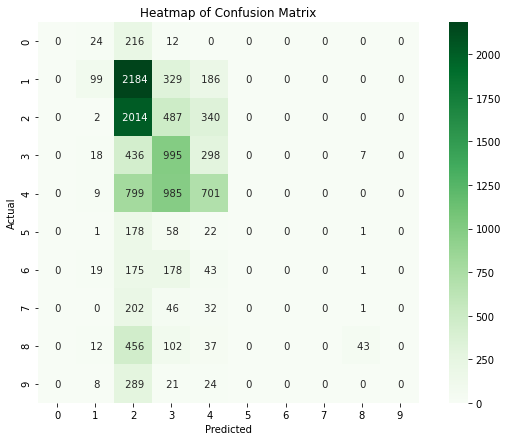

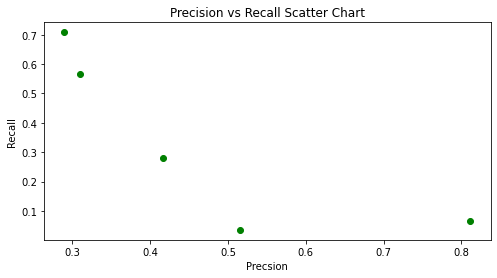

---------------------------------------------------------------------------------------------------------------


In [65]:
conv_neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, l_rate=0.01, epochs=5, momentum=0.7)

# Momentum = 0.9

Epoch 1/5
15/15 [==============================] - 0s 22ms/step - loss: 2.0844 - accuracy: 0.2232
Epoch 2/5
15/15 [==============================] - 0s 22ms/step - loss: 1.8569 - accuracy: 0.3246
Epoch 3/5
15/15 [==============================] - 0s 22ms/step - loss: 1.7371 - accuracy: 0.3304
Epoch 4/5
15/15 [==============================] - 0s 23ms/step - loss: 1.5822 - accuracy: 0.3986
Epoch 5/5
15/15 [==============================] - 0s 19ms/step - loss: 1.4526 - accuracy: 0.4507
---------------------------------------------------------------------------------------------------------------


Results


378/378 [==============================] - 1s 4ms/step - loss: 1.5428 - accuracy: 0.4763
loss of 1.542778491973877; accuracy of 47.63440787792206%


Confusion Matrix:
[[   0  230   11    5    5    0    0    0    1    0]
 [   0 2132  281   86  299    0    0    0    0    0]
 [   0 1007 1131  244  461    0    0    0    0    0]
 [   0  323  257  617  552    0    0    0    5    0]
 [   0 

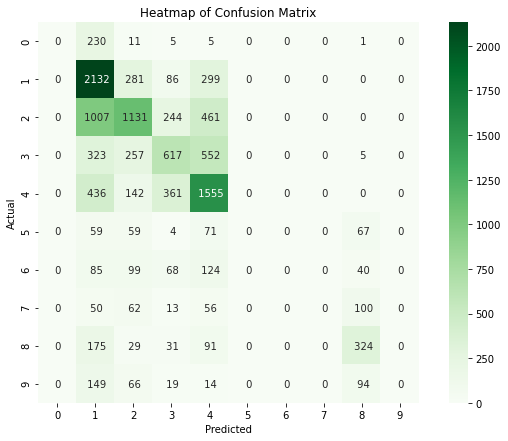

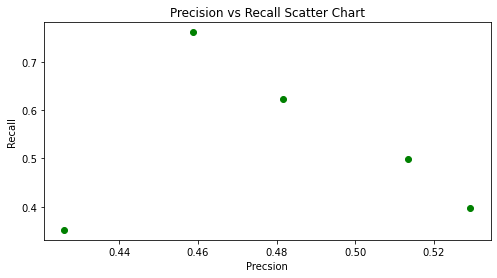

---------------------------------------------------------------------------------------------------------------


In [66]:
conv_neural_network(x_train_9000, y_train_9000, x_test_9000, y_test_9000, l_rate=0.01, epochs=5, momentum=0.9)